# Function Testing Notebook - Joseph

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [1]:
import logging
import os
import sys
from pathlib import Path

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from okabeito import black, blue, green, lightblue, orange, purple, red, yellow
from seaborn import axes_style

from pythoneeg import constants, core, visualization


/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tempdir = Path('../../tmp').resolve()
core.set_temp_directory(tempdir)
print(tempdir)

/mnt/isilon/marsh_single_unit/PythonEEG/tmp


In [3]:
# Set up logger with detailed formatting
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO, stream=sys.stdout, force=True)
logger = logging.getLogger()


Channel names: 	['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel Ctx', 'Intan Input (1)/PortB L Motor Ctx', 'Intan Input (1)/PortB R Motor Ctx', 'Intan Input (1)/PortB R Barrel Ctx', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
2025-07-30 14:59:23,977 - INFO - Feature data shape: (26159, 10, 1)
2025-07-30 14:59:24,003 - INFO - Feature data shape: (26159,)


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:489: UserWarning: Timestamps are not sorted. Sorting result DataFrame by timestamp.
  warnings.warn("Timestamps are not sorted. Sorting result DataFrame by timestamp.")


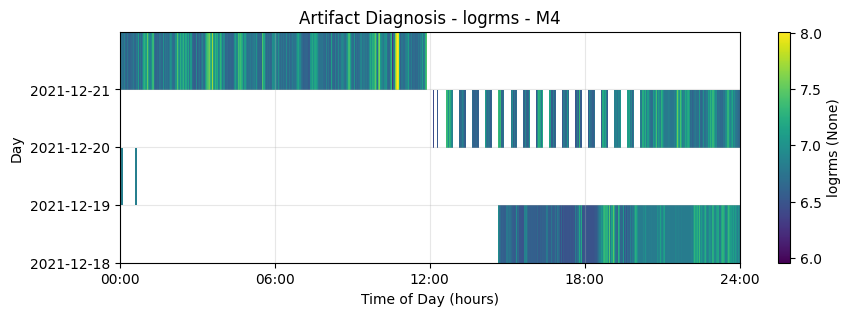

In [4]:
logger.setLevel(logging.INFO)
# war = visualization.WindowAnalysisResult.load_pickle_and_json(Path('./test-wars/G25'))
war = visualization.WindowAnalysisResult.load_pickle_and_json(Path('./test-wars-sox5-6/121821_cohort4_Group1_2mice M4'))

ap = visualization.AnimalPlotter(war)
# ap.plot_artifact_diagnosis(features='rms')
ap.plot_artifact_diagnosis(features='logrms')

# ap.plot_coherecorr_matrix(['isday'], bands=None, figsize=(16,5), cmap='viridis')
# ap.plot_coherecorr_diff(['isday'], bands=None, figsize=(16,5))
# ap.plot_linear_temporal(figsize=(20, 5), score_type='z', lw=1, channels=[0, 1])

# ap.plot_coherecorr_spectral(['isday'], figsize=(20, 5), score_type='center')

# ap.plot_coherecorr_spectral(figsize=(20, 5), score_type='center', features=['pcorr', 'cohere'])
# ap.plot_psd_histogram(figsize=(10, 4), avg_channels=True, plot_type='loglog')
# ap.plot_psd_spectrogram(figsize=(20, 4), mode='none')

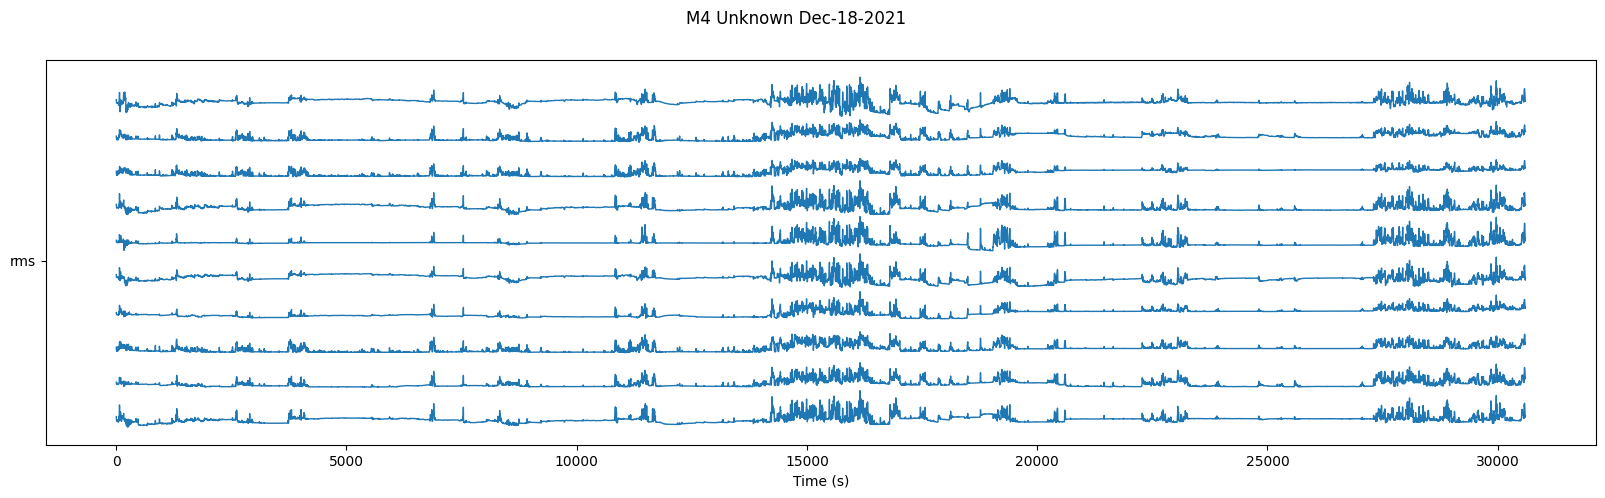

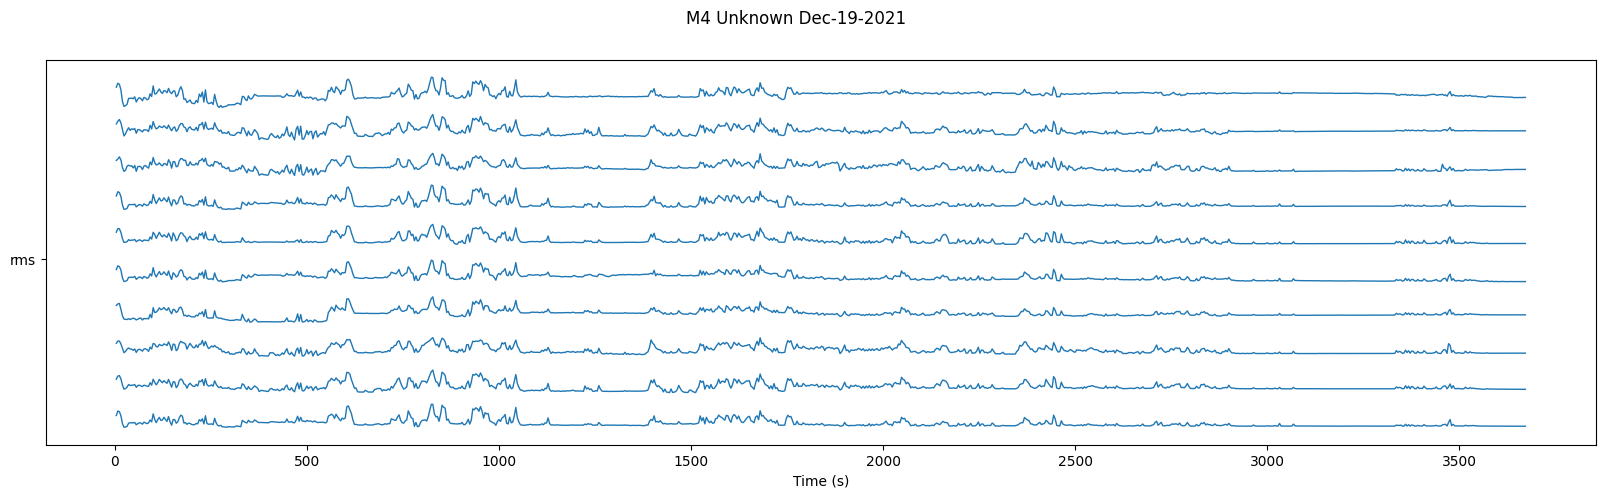

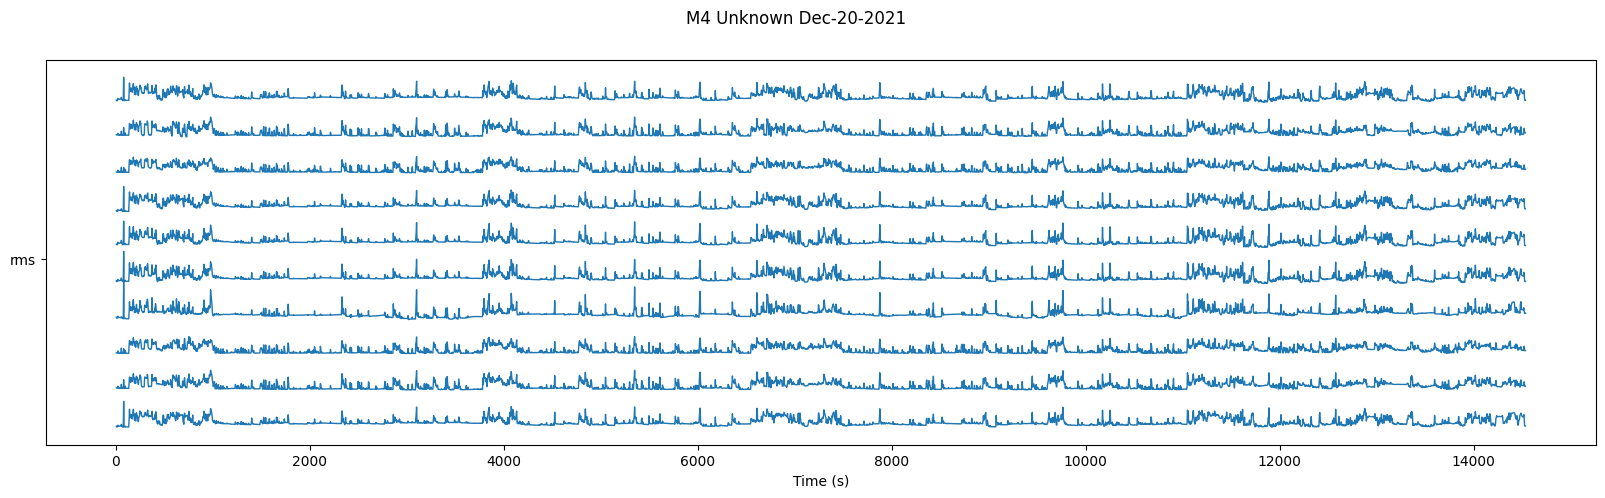

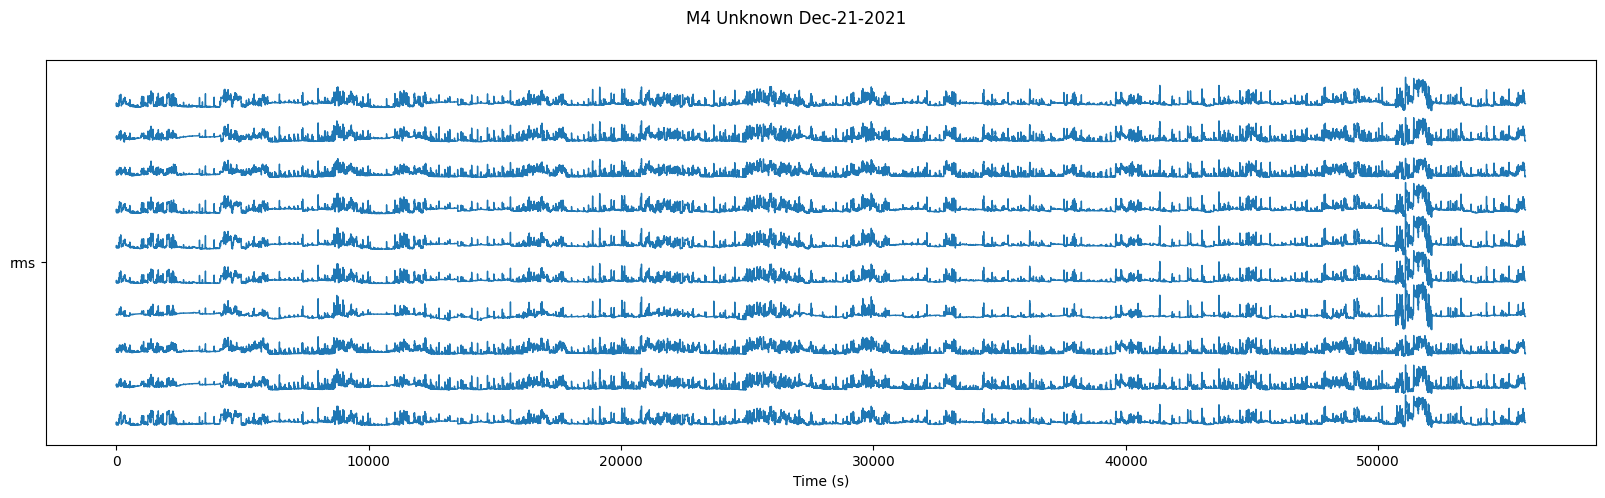

In [5]:
ap.plot_linear_temporal(['animalday'], features=['rms'], figsize=(20, 5), score_type='z', lw=1)


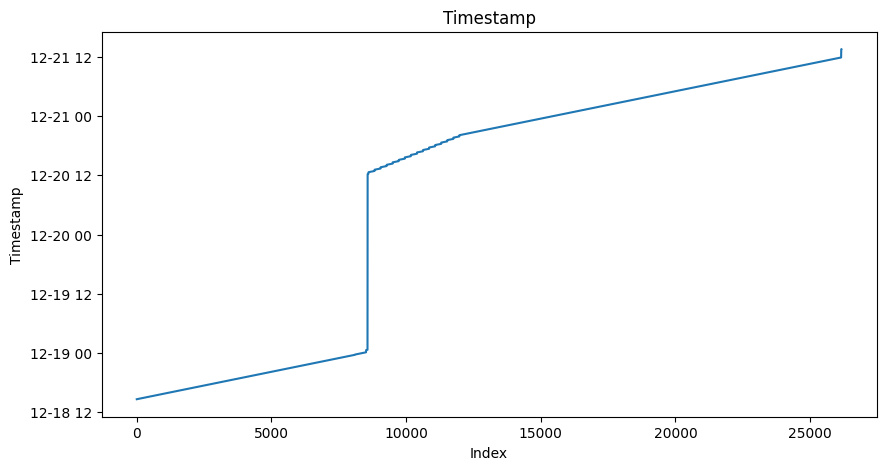

In [6]:
s = war.result['timestamp']
s = s.sort_values()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.arange(len(s)), s)
ax.set_xlabel('Index')
ax.set_ylabel('Timestamp')
ax.set_title('Timestamp')
plt.show()

In [7]:
# Get path to test-wars-sox5-7-coh-corr directory
test_dir = Path("./test-wars-sox5-7")

# Get all folders and their sizes
folder_sizes = []
for folder in test_dir.glob("*"):
    if folder.is_dir():
        # Calculate total size of folder by summing sizes of all files
        size = sum(f.stat().st_size for f in folder.rglob('*') if f.is_file())
        folder_sizes.append((folder, size))

# Sort by size
folder_sizes.sort(key=lambda x: x[1])

# Print folders and sizes
print("Folders sorted by size (smallest to largest):")
for folder, size in folder_sizes:
    # Convert size to MB for readability
    size_mb = size / (1024 * 1024)
    print(f"{size_mb:.2f} MB : {folder.name}")


Folders sorted by size (smallest to largest):
22.34 MB : 031921_cohort 2 group 5 and group 6 mouse M3 cage1A
22.39 MB : 061322_Group10 M8, M10 M8
25.67 MB : 061322_Group10 M8, M10 M10
45.05 MB : 061722_group10 M3, F8 M3
45.05 MB : 061722_group10 M3, F8 F8
537.52 MB : 061022_group 9 M1, M2, M3 group9_M2_Cage 3
559.72 MB : 060921_Cohort 3_EM1_AM2_GF4 AM2
785.78 MB : 082922_group4_2mice_MMUT_FMUT FMUT
934.66 MB : 012322_cohort4_group6_3mice_FMUT___MMUT_MWT FHET
1089.38 MB : 061022_group 9 M1, M2, M3 group9_M1_Cage1
1309.25 MB : 121821_cohort4_Group1_2mice M4
1328.06 MB : 121821_cohort4_Group1_2mice M2
1396.78 MB : 061022_group 9 M1, M2, M3 group9_M3_Cage 4
1463.87 MB : 010822_cohort4_group2_2mice_MWT_MHET M10
1514.48 MB : 062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 CF2
1514.51 MB : 062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 IF5
1514.52 MB : 062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 BF3
1514.52 MB : 062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 CM5
1884.28 MB : 081922_coho

In [8]:
raise Exception()

Exception: 

In [ ]:
logger.setLevel(logging.INFO)
wars = []
# animal_ids = ['A5', 'A10', 'F22']
animal_ids = [p for p in Path("./test-wars-sox5-collapsed-7-isday").glob("*") if p.is_dir()]
# bad_animal_ids = []
bad_animal_ids = [
    "013122_cohort4_group7_2mice both_FHET FHET(2)",
    "012322_cohort4_group6_3mice_FMUT___MMUT_MWT MHET",
    "012322_cohort4_group6_3mice_FMUT___MMUT_MWT MMUT",
    "011622_cohort4_group4_3mice_MMutOLD_FMUT_FMUT_FWT OLDMMT",
    "011322_cohort4_group3_4mice_AllM_MT_WT_HET_WT M3",
    "012322_cohort4_group6_3mice_FMUT___MMUT_MWT FHET"
    # "060921_Cohort 3_EM1_AM2_GF4 AM2" # this seems fine just very high delta for whatever reason
]
animal_ids = [p for p in animal_ids if p.name not in bad_animal_ids]
print([p.name for p in animal_ids])

for i, animal_id in enumerate(animal_ids):
    war = visualization.WindowAnalysisResult.load_pickle_and_json(animal_id)
    # if i == 0:
    #     display(war.result)
    # if war.genotype in ['FWT', 'FHet', 'FMut']:
    # if war.genotype in ['MWT', 'MHet', 'MMut']:

    war.add_unique_hash(4)
    war.reorder_and_pad_channels(["LMot", "RMot", "LBar", "RBar", "LAud", "RAud", "LVis", "RVis"])
    wars.append(war)
    
# Sort wars by genotype in order MWT, MHet, MMut
genotype_order = ['MWT', 'MHet', 'MMut', 'FWT', 'FHet', 'FMut']
# wars = sorted(wars, key=lambda x: genotype_order.index(x.genotype))


plot_order = constants.DF_SORT_ORDER.copy()
plot_order['genotype'] = genotype_order
ep = visualization.ExperimentPlotter(
    wars=wars,
    exclude=["nspike", "lognspike", "pcorr", "cohere"],
    # exclude=["nspike", "psdfrac", "logrms", "logampvar", "logpsdtotal", "lognspike", "logpsdband", "logpsdfrac"],
    plot_order=plot_order
)
# 

['071321_Cohort 3_AM4_CF1_DF3_FF6 DF3', '031722_cohort_6_group1_3mice_MMUT_MMUT_MWT M7', '012022_cohort4_group5_3mice__FWT_MMUT_FMUT FWT', '031021_cohort 2, group 3 and 4 #8 Cage 1A', '031921_cohort 2 group 5 and group 6 mouse M5 cage2A', '062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 BF3', '031621_cohort 2 group 2 and group 5 F10', '062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 AM3', '031021_cohort 2, group 3 and 4 #2 Cage 2A', '010822_cohort4_group2_2mice_MWT_MHET M10', '011322_cohort4_group3_4mice_AllM_MT_WT_HET_WT M2', '031722_cohort_6_group1_3mice_MMUT_MMUT_MWT MMUT(2)', ' 032221_cohort 2, Group 3, Mouse 6 Cage 2A Re-Recording', '062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 CM9', '062122_group 10_2mice_F7Het_F9Mut F9', '062921_Cohort 3_AM3_AM5_CM9_BM6_CM5_CF2_IF5_BF3 CM5', '031621_cohort 2 group 2 and group 5 M2', '061322_Group10 M8, M10 M10', '081922_cohort10_group4_2mice_FMut_FHet FMUT', '011622_cohort4_group4_3mice_MMutOLD_FMUT_FMUT_FWT FMUT_', '061022_group 9 M1, M2, M3

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.concat_df_wars: pd.DataFrame = pd.concat(


In [ ]:
df = ep.pull_timeseries_dataframe(feature='zcohere', groupby=['genotype', 'isday'], **ep._get_default_pull_timeseries_params())
# display(df)
df = ep.pull_timeseries_dataframe(feature='zcohere', groupby=['genotype', 'isday'], average_groupby=True)
# display(df)
# check that ep is reporting the right thing for 

2025-07-27 18:16:22,515 - INFO - feature: zcohere, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False
2025-07-27 18:16:22,634 - INFO - feature: zcohere, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1010: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_base = df.groupby(baseline_groupby, as_index=False).get_group(
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:1021: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  baseline_means = df_base.groupby(remaining_groupby)[feature].apply(core.utils.nanmean_series_of_np)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:691: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)


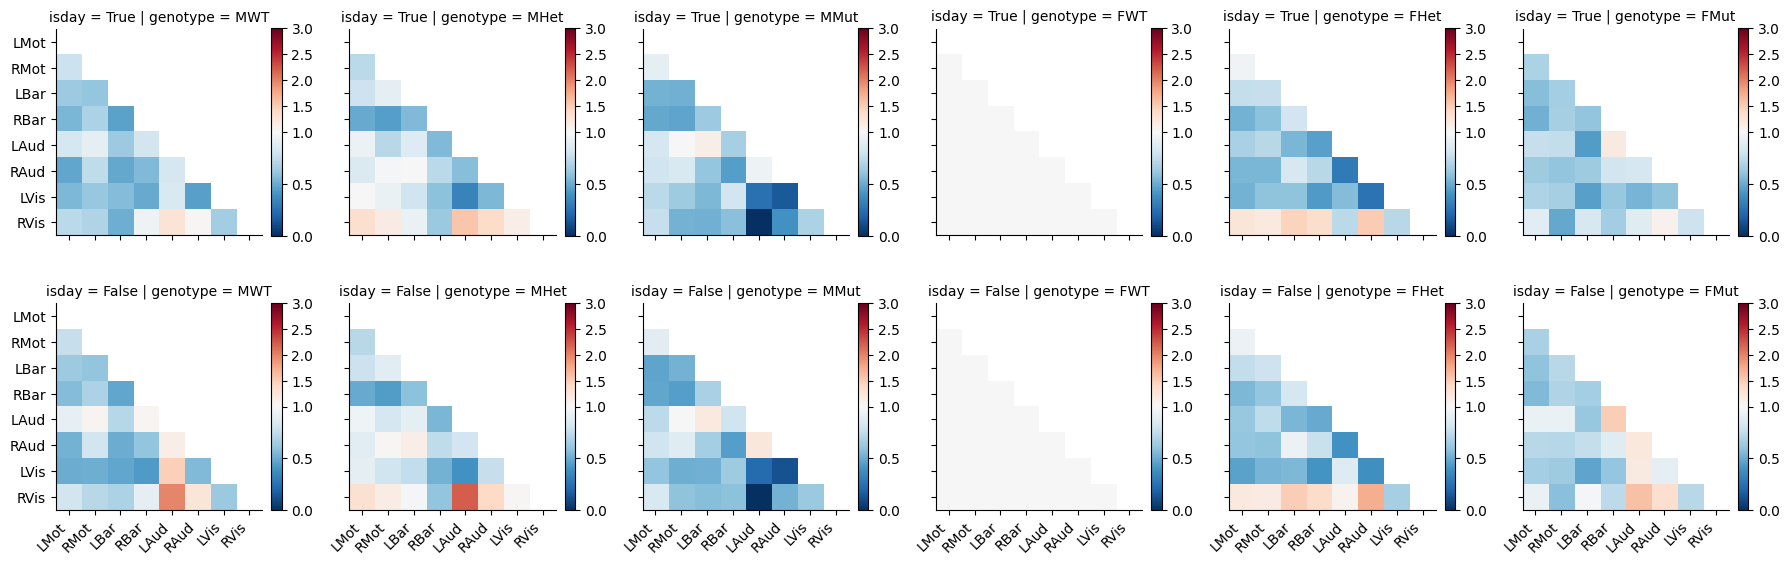

In [ ]:
logger.setLevel(logging.WARNING)

# ep.plot_diffheatmap('cohere', groupby=['genotype', 'isday'], baseline_key='FWT', baseline_groupby='genotype')
# ep.plot_heatmap('cohere', groupby=['genotype', 'isday'], col='band', row='isday')

save_fol = "/home/dongjp/Downloads/7-27 ep"
# figs = ep.plot_heatmap_faceted('cohere', groupby=['genotype', 'isday'], facet_vars='band', col='genotype', row='isday')
# figs = ep.plot_diffheatmap_faceted('cohere', groupby=['genotype', 'isday'], facet_vars=['band'], baseline_key=False, baseline_groupby='isday', col='genotype', row='isday')
# figs = ep.plot_diffheatmap_faceted('cohere', groupby=['genotype', 'isday'], facet_vars=['band'], baseline_key='MWT', baseline_groupby='genotype', col='genotype', row='isday')

ep.pull_timeseries_dataframe(
    feature="zpcorr", groupby=["genotype", "isday"]
)
# display(df)
# figs = ep.plot_diffheatmap_faceted(
#     "zpcorr",
#     groupby=["genotype", "isday"],
#     facet_vars=["isday"],
#     baseline_key="MWT",
#     baseline_groupby="genotype",
#     operation="divide",
#     col="genotype",
#     row="isday",
#     df=df,
#     cmap="RdBu_r",
#     norm=colors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=3),
# )
figs = ep.plot_diffheatmap(
    "zpcorr",
    groupby=["genotype", "isday"],
    baseline_key="FWT",
    baseline_groupby="genotype",
    operation="divide",
    norm=colors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=3),
)

# # Create save folder if it doesn't exist
# Path(save_fol).mkdir(parents=True, exist_ok=True)

# # Save each figure with its title
# for i, fig in enumerate(figs):
#     # Get the title from the figure
#     title = fig.figure._suptitle.get_text()

#     # Clean up title to make it filename-safe
#     filename = title.replace(" | ", "_").replace("=", "_").replace(" ", "_")
#     filename = f"cohere {filename} subtract WT"

#     # Save figure
#     fig.figure.savefig(Path(save_fol) / f"{filename}.png", bbox_inches="tight", dpi=300)

# from pathlib import Path

In [ ]:
def process_feature_dataframe(df, feature):
    """Process feature dataframe by adding categorical columns and pivoting.

    Args:
        df (pd.DataFrame): Input dataframe with feature data
        feature (str): Name of feature being processed

    Returns:
        tuple: (processed_df, pivoted_df)
    """
    if feature in ["logpsdfrac", "logpsdband", "psdband", "zcohere"]:
        groupby = ["animal", "isday", "band"]
        # band_order = ["delta", "theta", "alpha", "beta", "gamma"]
        # df["band"] = pd.Categorical(df["band"], categories=band_order, ordered=True)
    elif feature in ["zpcorr", "psd", "normpsd"]:
        groupby = ["animal", "isday"]
    else:
        raise ValueError(f"Feature {feature} not supported")
    if "isday" not in df.columns:
        groupby.remove("isday")

    # genotype_order = ["FWT", "FHet", "FMut", "MWT", "MHet", "MMut"]
    # gene_order = ["WT", "Het", "Mut"]

    # df["genotype"] = pd.Categorical(df["genotype"], categories=genotype_order, ordered=True)
    df["sex"] = df["genotype"].map(
        lambda x: "Male" if x in ["MWT", "MHet", "MMut"] else "Female" if x in ["FWT", "FHet", "FMut"] else None
    )
    df["gene"] = df["genotype"].map(
        lambda x: "WT"
        if x in ["MWT", "FWT"]
        else "Het"
        if x in ["MHet", "FHet"]
        else "Mut"
        if x in ["MMut", "FMut"]
        else x
    )
    # df["gene"] = pd.Categorical(df["gene"], categories=gene_order, ordered=True)
    if "isday" in df.columns:
        df["isday"] = df["isday"].map(lambda x: "Day" if x else "Night")

    # if "band" in df.columns:
    #     df = df.sort_values(["band", "gene", "sex"])
    # else:
    #     df = df.sort_values(["gene", "sex"])

    df_pivot = df.pivot_table(
        index=["animal", "gene", "sex"] if "freq" not in df.columns else ["animal", "gene", "sex", "freq"],
        columns=["isday", "band"] if ("isday" in df.columns and "band" in df.columns) else "band" if "band" in df.columns else "isday" if "isday" in df.columns else None,
        values=feature,
        aggfunc="mean",
        observed=True,
    ).reset_index()

    if isinstance(df_pivot.columns, pd.MultiIndex):
        df_pivot.columns = [
            "-".join(str(x) for x in col if x != "") if isinstance(col, tuple) else col for col in df_pivot.columns
        ]
    df_pivot.columns.name = None
    # if "band" in df_pivot.columns:
    #     df_pivot = df_pivot.sort_values(["band", "gene", "sex"])
    # else:
    #     df_pivot = df_pivot.sort_values(["gene", "sex"])

    return df, df_pivot

In [ ]:
save_folder = '/home/dongjp/Downloads/7-27 ep'
save_files = True
save_folder = Path(save_folder)
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
display(save_folder)

PosixPath('/home/dongjp/Downloads/7-27 ep')

In [ ]:
df = ep.pull_timeseries_dataframe(feature="zcohere", groupby=["animal", "genotype"], collapse_channels=True, average_groupby=True)
df, df_pivot = process_feature_dataframe(df, "zcohere")
# display(df)
# display(df_pivot)

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:332: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:332: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:332: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:332: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)


In [ ]:
logger.setLevel(logging.INFO)

# features = ['psdtotal', 'psdslope', 'logpsdtotal']
# features = ["pcorr", "cohere", "logpsdfrac", "logpsdband"]
features = ["zpcorr", "zcohere", "logpsdfrac", "logpsdband", "psdband", "psd", "normpsd"]
feature_to_label = {
    "zpcorr": "Pearson Correlation",
    "zcohere": "Coherence",
    "logpsdfrac": "Log Percent Power",
    "logpsdband": "Log Band Power",
    "psdband": "Band Power ($\mu V^2$)",
    "psd": "PSD ($\mu V^2/Hz$)",
    "normpsd": "Normalized PSD",
}
# features = ["psdfrac"]
# features = ["psd", "normpsd"]
for feature in features:
    # df = ep.pull_timeseries_dataframe(feature=feature, groupby=["animal", "genotype", "isday"], collapse_channels=True)
    if feature == "normpsd":
        df = ep.pull_timeseries_dataframe(feature="psd", groupby=["animal", "genotype", 'isday'], collapse_channels=True, average_groupby=True)
        df_total = ep.pull_timeseries_dataframe(feature="psdtotal", groupby=["animal", "genotype", 'isday'], collapse_channels=True, average_groupby=True)
        
        df = df.merge(df_total, on=["animal", "genotype", "channel"], suffixes=("", "_total"))
        df["normpsd"] = df["psd"] / df["psdtotal"]
    else:
        df = ep.pull_timeseries_dataframe(feature=feature, groupby=["animal", "genotype", 'isday'], collapse_channels=True, average_groupby=True)

    df, df_pivot = process_feature_dataframe(df, feature)

    if save_files:
        df.to_csv(save_folder / f"{feature}.csv")
        df_pivot.to_csv(save_folder / f"{feature}-pivot.csv")

    if feature == "zpcorr":
        p = (
            so.Plot(df, x="sex", y=feature, color="gene", marker="sex")
            .facet(col="isday")
            .add(so.Dash(color="k"), so.Agg(), so.Dodge(empty="drop", gap=0.2))
            .add(so.Range(color="k"), so.Est(errorbar="sd"), so.Dodge(empty="drop", gap=0.2))
            .add(so.Dot(), so.Dodge(empty="drop", gap=0.2), so.Jitter(0.75, seed=42))
            # .add(
            #     so.Text(valign="top", fontsize=10),
            #     so.Dodge(empty="drop", gap=0.2),
            #     so.Jitter(0.5, seed=42),
            #     text="animal",
            # )
            .scale(marker=so.Nominal(["o", "s"], order=["Female", "Male"]))
            .theme(
                axes_style("ticks")
                | sns.plotting_context("notebook")
                | {"axes.prop_cycle": plt.cycler(color=["blue", "blueviolet", "red"])}
                | {"axes.spines.right": False, "axes.spines.top": False}
            )
            .layout(size=(6, 6))
            .label(y=feature_to_label[feature])
        )
        if save_files:
            p.save(save_folder / f"{feature}.tif", bbox_inches="tight", dpi=300)
        else:
            p.show()
    elif feature in ["logpsdfrac", "logpsdband", "psdband", "zcohere"]:
        p = (
            so.Plot(df, x="band", y=feature, color="gene", marker="sex")
            .facet(col="isday")
            .add(so.Dash(color="k"), so.Agg(), so.Dodge())
            .add(so.Range(color="k"), so.Est(errorbar="sd"), so.Dodge())
            .add(so.Dot(), so.Dodge(), so.Jitter(0.75, seed=42))
            # .add(
            #     so.Text(valign="top", fontsize=10),
            #     so.Dodge(),
            #     so.Jitter(seed=42),
            #     text="animal",
            # )
            .scale(marker=so.Nominal(["o", "s"], order=["Female", "Male"]))
            .theme(
                axes_style("ticks")
                | sns.plotting_context("notebook")
                | {"axes.prop_cycle": plt.cycler(color=["blue", "blueviolet", "red", "blue", "blueviolet", "red"])}
                | {"axes.spines.right": False, "axes.spines.top": False}
            )
            .label(x="Frequency band", y=feature_to_label[feature])
        )
        p1 = p.layout(size=(10, 6), engine="tight")
        # p2 = p.add(
        #     so.Text(valign="top", fontsize=10),
        #     so.Dodge(),
        #     so.Jitter(seed=42),
        #     text="animal",
        # ).layout(size=(20, 10), engine="tight")

        if save_files:
            p1.save(save_folder / f"byband-{feature}.tif", bbox_inches="tight", dpi=300)
            # p2.save(save_folder / f"byband-{feature}-text.png", bbox_inches="tight")
        else:
            p1.show()
            # p2.show()

        # with mpl.rc_context(plt.style.library["bmh"] | sns.plotting_context("notebook")):
        # with mpl.rc_context(sns.plotting_context("notebook")):
        p = (
            so.Plot(df, x="gene", y=feature, color="band", marker="sex")
            .facet(col="isday")
            .add(so.Dash(color="k"), so.Agg(), so.Dodge())
            .add(so.Range(color="k"), so.Est(errorbar="sd"), so.Dodge())
            .add(so.Dot(), so.Dodge(), so.Jitter(0.75, seed=42))
            # .theme(plt.style.library['bmh'])
            .theme(
                axes_style("ticks")
                | sns.plotting_context("notebook")
                | {"axes.prop_cycle": plt.cycler(color=[blue, orange, red, green, purple, yellow, lightblue, black])}
                | {"axes.spines.right": False, "axes.spines.top": False}
            )
            .layout(size=(10, 6), engine="tight")
            .label(x="Genotype", y=feature_to_label[feature])
        )
        # p = p.add(so.Text(valign="top", fontsize=10), so.Dodge(), so.Jitter(seed=42), text="animal")
        if save_files:
            p.save(save_folder / f"bygeno-{feature}.tif", bbox_inches="tight", dpi=300)
        else:
            p.show()
    elif feature == "psd" or feature == "normpsd":
        ylim = (1e-4, 1) if feature == "normpsd" else (0.3, 3000)
        p = (
            so.Plot(df, x="freq", y=feature, color="gene")
            .facet(col="sex", row="isday")
            # .facet(col="sex")
            # .add(so.Line(), so.Agg(), so.Norm())
            .add(so.Line(), so.Agg()) # TODO norm manually in the dataframe and also plot bands. Norm by max value for each dataframe? or by max value for average genotype?
            .add(so.Band(), so.Est())
            .scale(x='log', y='log')
            .theme(
                axes_style("ticks")
                | sns.plotting_context("notebook")
                | {"axes.prop_cycle": plt.cycler(color=["blue", "blueviolet", "red"])}
                | {"axes.spines.right": False, "axes.spines.top": False}
            )
            .limit(x=(1, 100), y=ylim)
            .layout(size=(10, 6))
            .label(x="Frequency (Hz)", y=feature_to_label[feature])
        )

        if save_files:
            p.save(save_folder / f"{feature}.tif", bbox_inches="tight", dpi=300)
        else:
            p.show()

2025-07-27 18:16:26,407 - INFO - feature: zpcorr, groupby: ['animal', 'genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:317: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:317: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:317: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:317: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, tril_indices[0], tril_indices[1]], axis=-1)


2025-07-27 18:16:27,518 - INFO - feature: zcohere, groupby: ['animal', 'genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:332: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:332: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:332: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:332: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals[:, :, tril_indices[0], tril_indices[1]], axis=-1)


2025-07-27 18:16:29,206 - INFO - feature: logpsdfrac, groupby: ['animal', 'genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-07-27 18:16:31,145 - INFO - feature: logpsdband, groupby: ['animal', 'genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-07-27 18:16:33,037 - INFO - feature: psdband, groupby: ['animal', 'genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-07-27 18:16:35,533 - INFO - feature: psd, groupby: ['animal', 'genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)


2025-07-27 18:18:11,953 - INFO - feature: psd, groupby: ['animal', 'genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)


2025-07-27 18:18:15,194 - INFO - feature: psdtotal, groupby: ['animal', 'genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: True


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:303: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


In [ ]:
df = ep.pull_timeseries_dataframe(feature="psd", groupby=["animal", "genotype", "isday"], collapse_channels=True)

df, df_pivot = process_feature_dataframe(df, "psd")


2025-07-27 18:19:49,908 - INFO - feature: psd, groupby: ['animal', 'genotype', 'isday'], channels: all, collapse_channels: True, average_groupby: False


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:365: RuntimeWarning: Mean of empty slice
  psd_vals = np.nanmean(psd_vals, axis=1)


In [ ]:
# import statsmodels.api as sm
# from statsmodels.stats.anova import AnovaRM

# anova = AnovaRM(df, depvar='psd', subject='animal',
#                 within=['isday'], between=['sex'])
# result = anova.fit()

# display(result)


In [ ]:
# for feat in constants.LINEAR_FEATURE + ['psdband']:
#     logging.info(f'pulling {feat}')
#     df = ep._pull_timeseries_dataframe(feat, 'animal')
#     # display(df)
#     # ep.plot_boxplot_2(feat, ['genotype', 'animalday'], collapse_channels=False)
#     ep.plot_catplot(feat, 'animal', kind='violin')

# ep.plot_catplot('psdband', ['animal', 'isday', 'animalday'], 
#                 x='animal',
#                 col='isday',
#                 hue='band',
#                 kind='boxen',
#                 collapse_channels=False,
#                 catplot_params={'showfliers': False})

In [ ]:
# for feat in ['cohere']:
#     logging.info(f'pulling {feat}')
#     df = ep._pull_timeseries_dataframe(feat, ['animal', 'isday'])
#     ep.plot_2d_feature_2(feat, ['animal', 'isday'], row='band')

In [ ]:
logger.setLevel(logging.INFO)
# df = ep.pull_timeseries_dataframe('cohere', ['genotype', 'isday'])
# df = ep.pull_timeseries_dataframe('pcorr', ['genotype'], average_groupby=False)
df = ep.pull_timeseries_dataframe('pcorr', ['genotype', 'isday'])


# ep.plot_heatmap('cohere', groupby=['animalday', 'genotype'])
ep.plot_heatmap('cohere', groupby=['genotype', 'isday'])


# ep.plot_heatmap('cohere', groupby='animalday', col='band', row='animalday')

ep.plot_heatmap('pcorr', groupby=['genotype', 'isday'])
ep.plot_heatmap('pcorr', groupby='genotype')

2025-07-27 18:19:54,870 - INFO - feature: pcorr, groupby: ['genotype', 'isday'], channels: all, collapse_channels: False, average_groupby: False


ValueError: 'pcorr' feature not found in ['DF3_fc1d3500 FWT Jul-13-2021' 'DF3_fc1d3500 FWT Jul-14-2021'
 'DF3_fc1d3500 FWT Jul-15-2021' 'DF3_fc1d3500 FWT Jul-16-2021']

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_uni

Skipping feature nspike
Skipping feature logrms
Skipping feature logampvar
Skipping feature logpsdtotal
Skipping feature lognspike


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:300: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


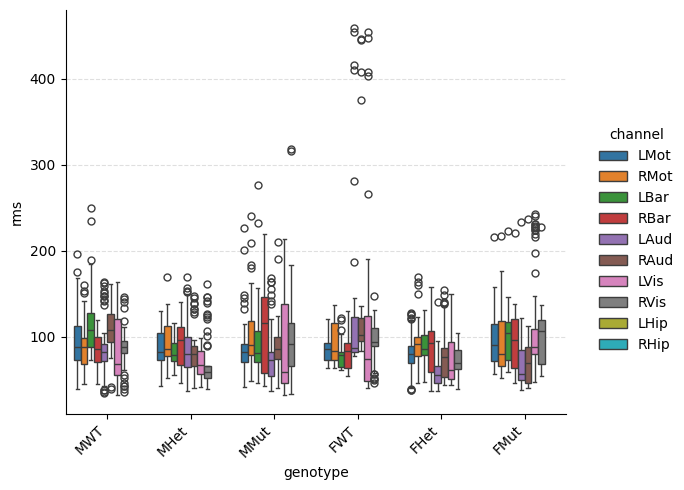

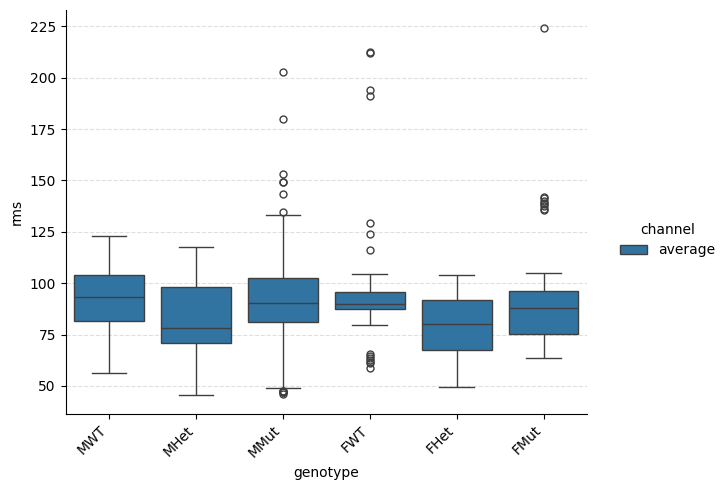

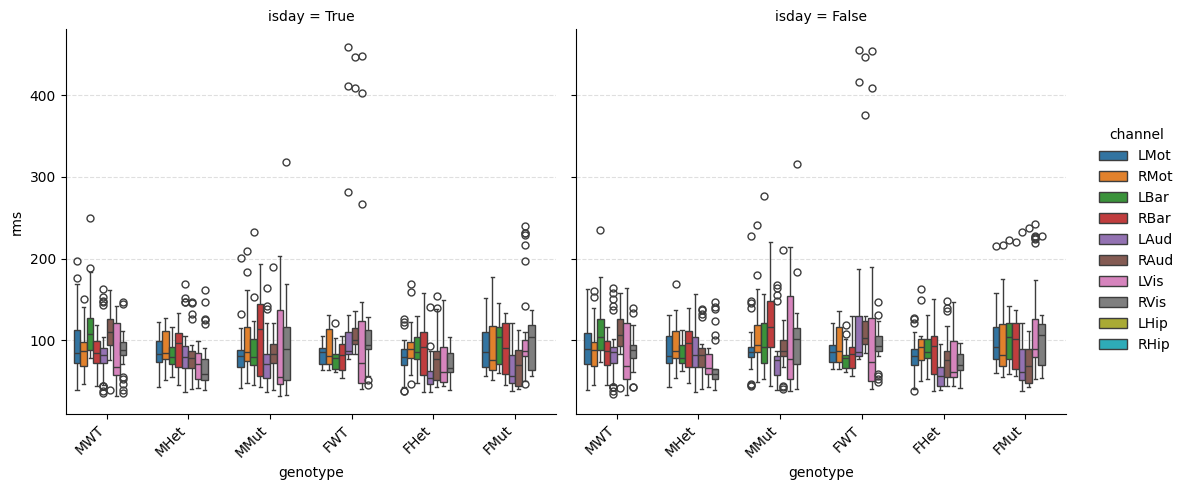

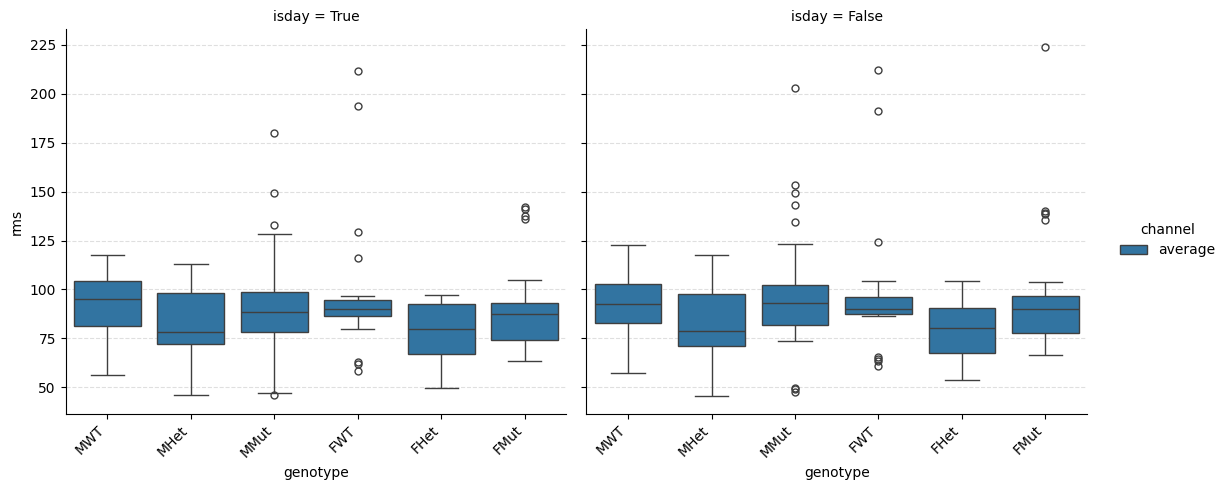

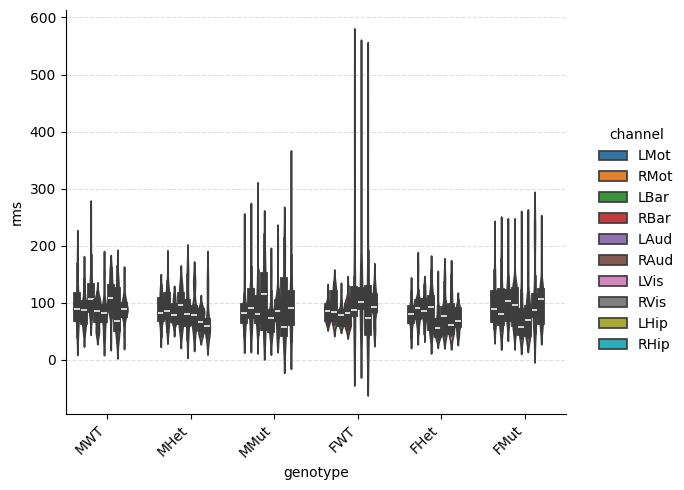

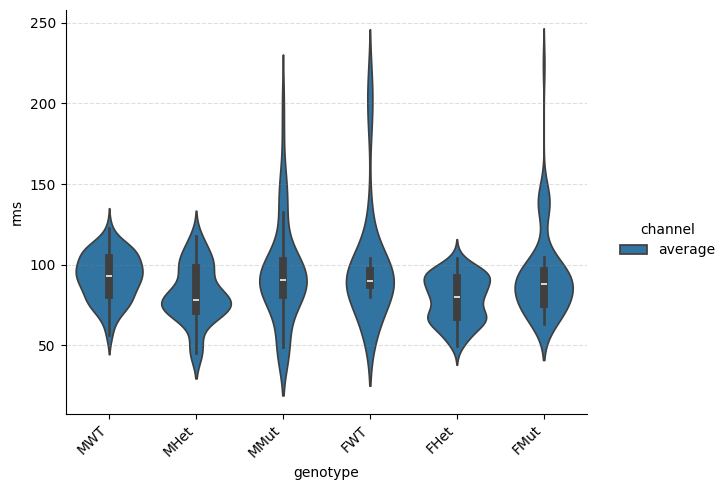

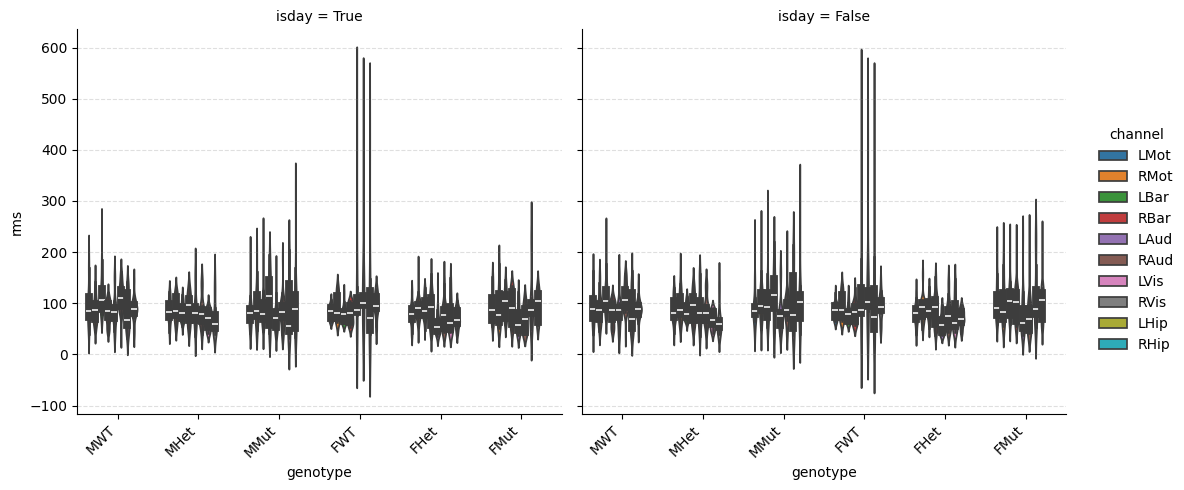

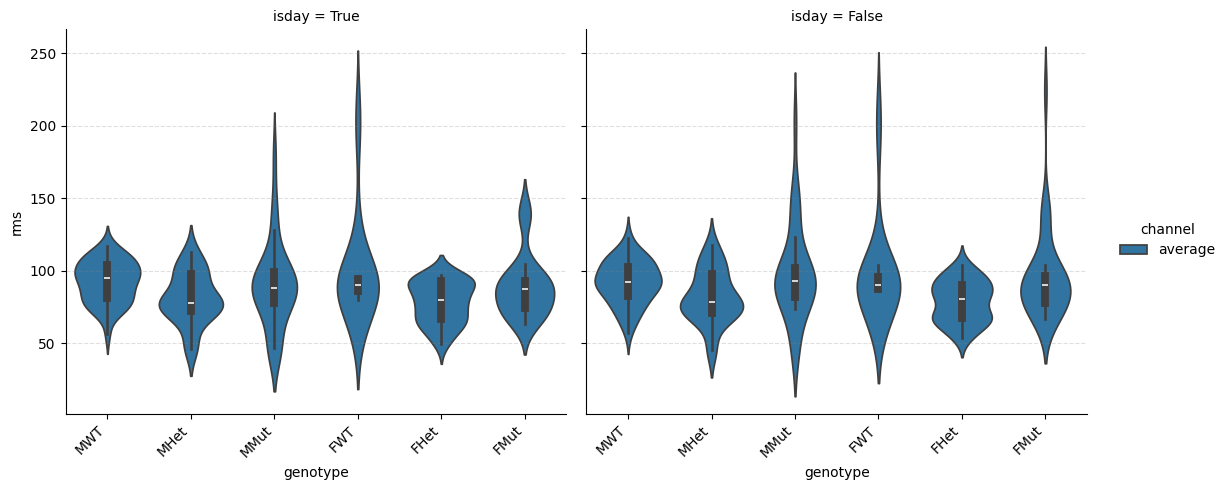

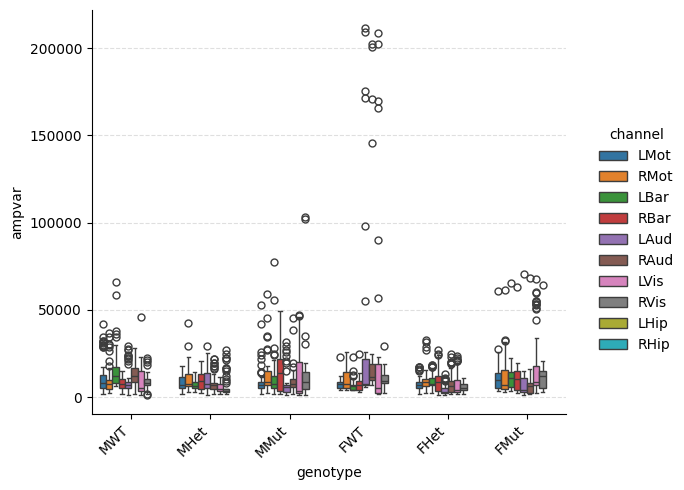

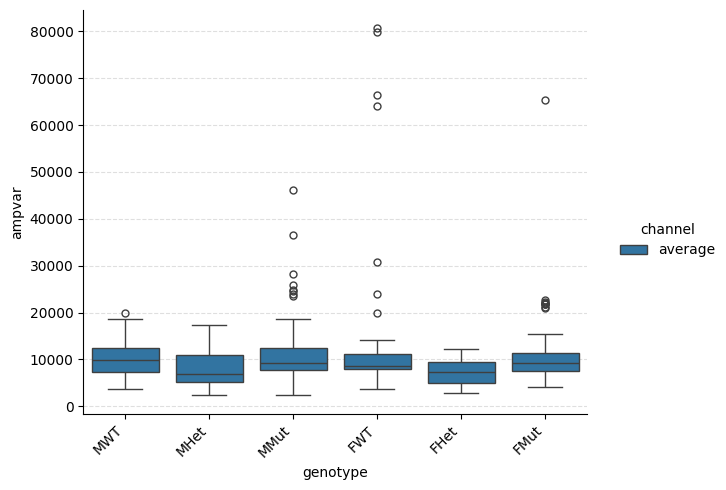

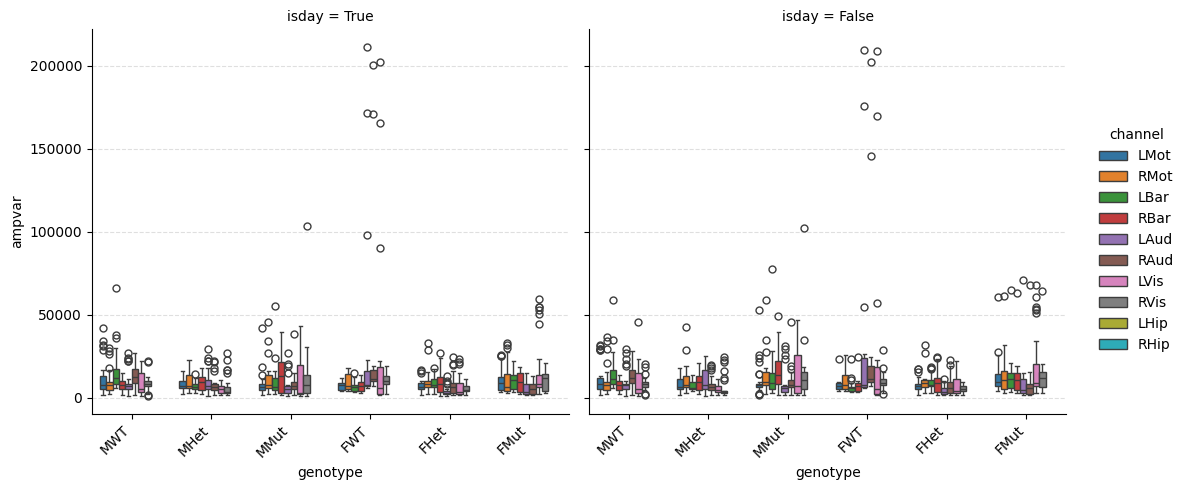

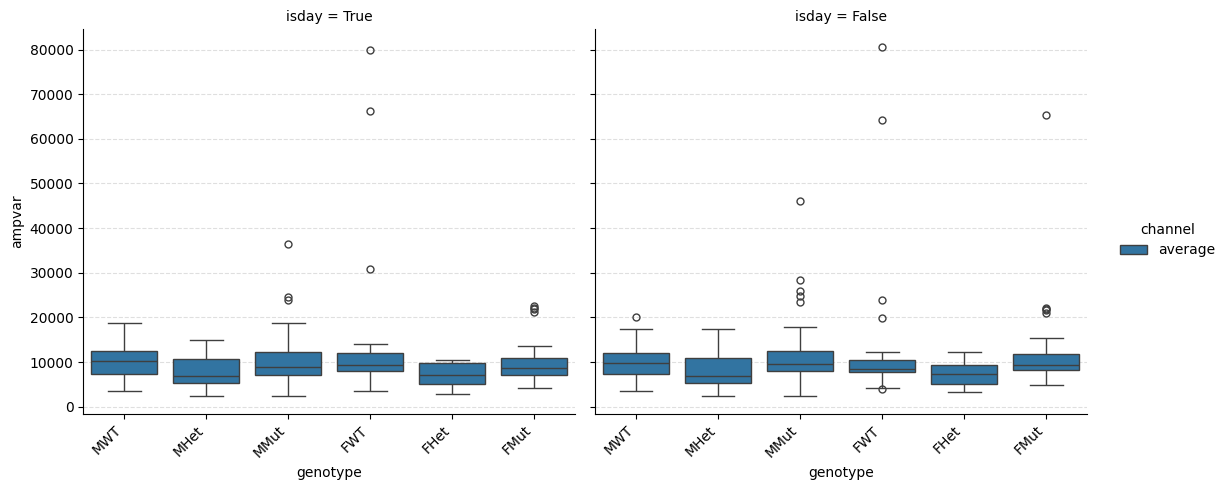

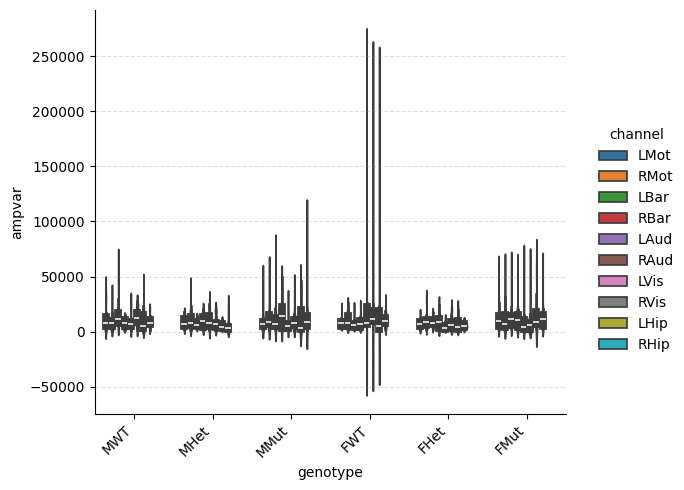

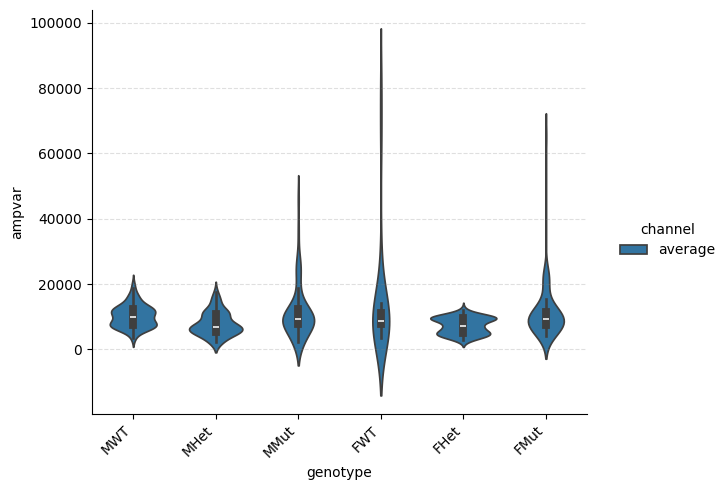

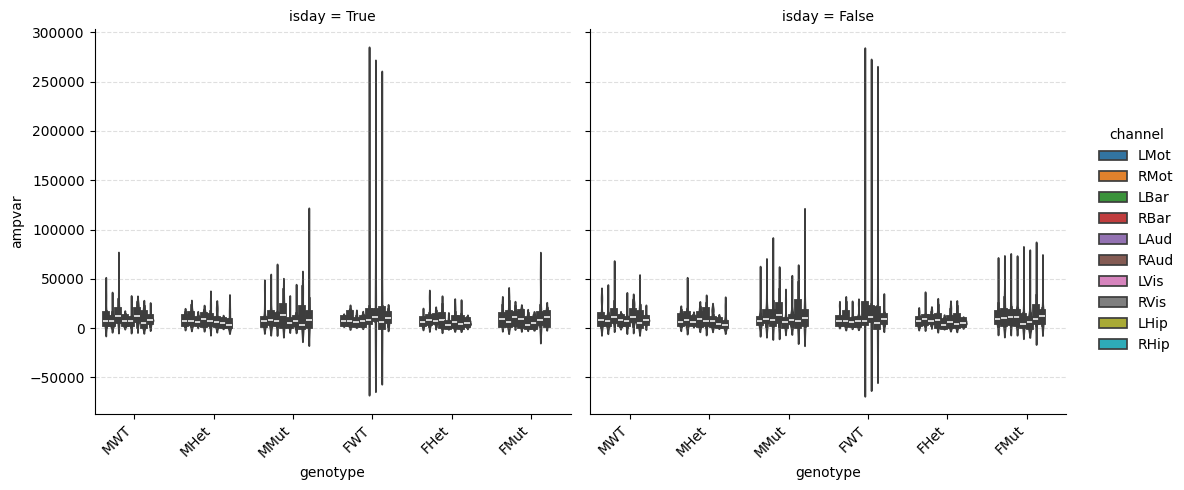

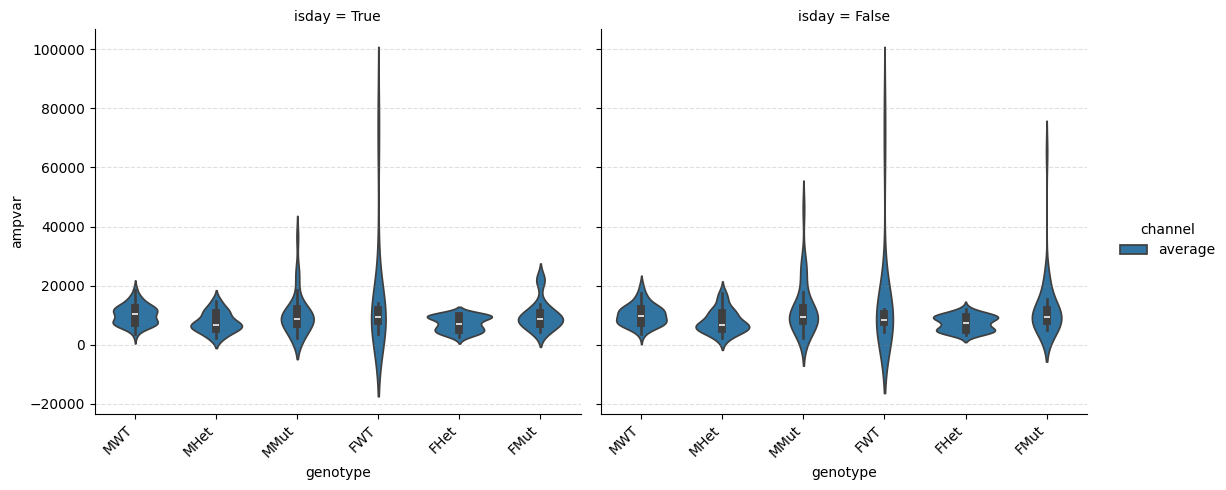

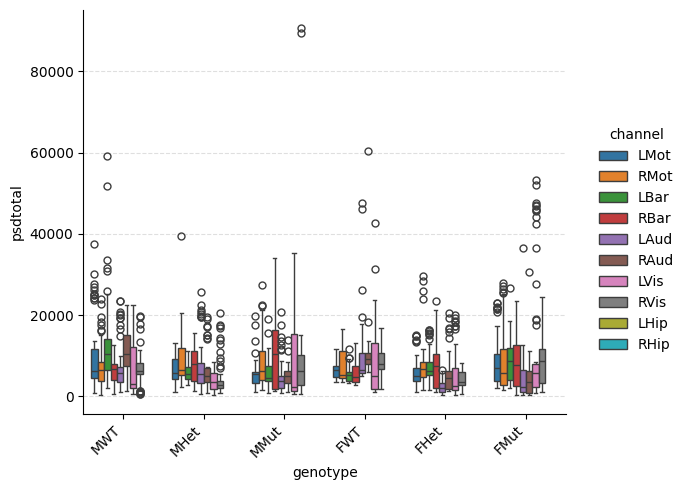

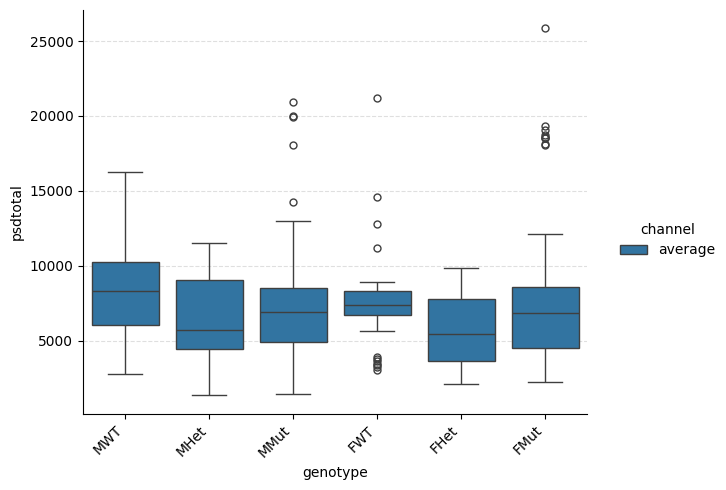

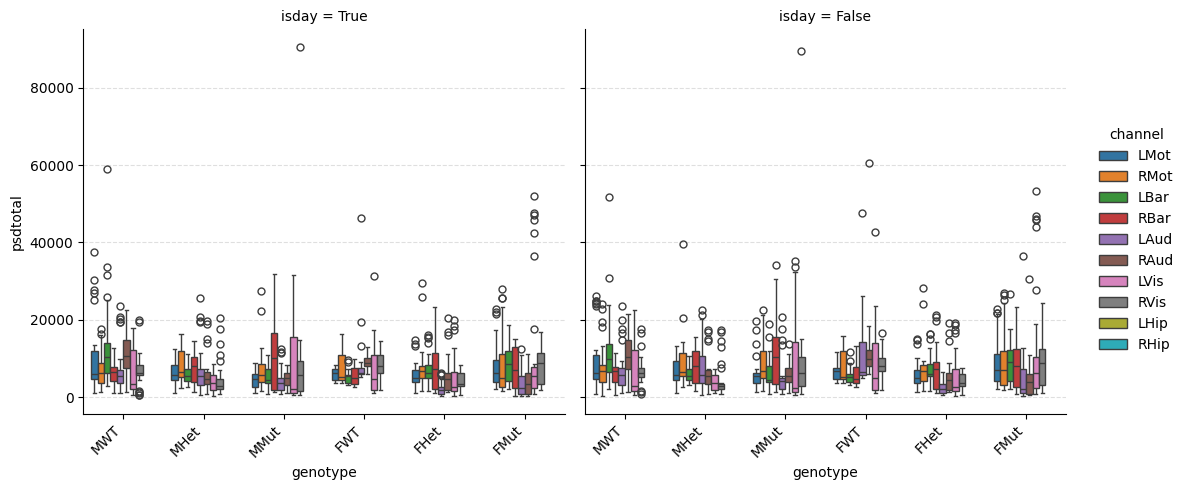

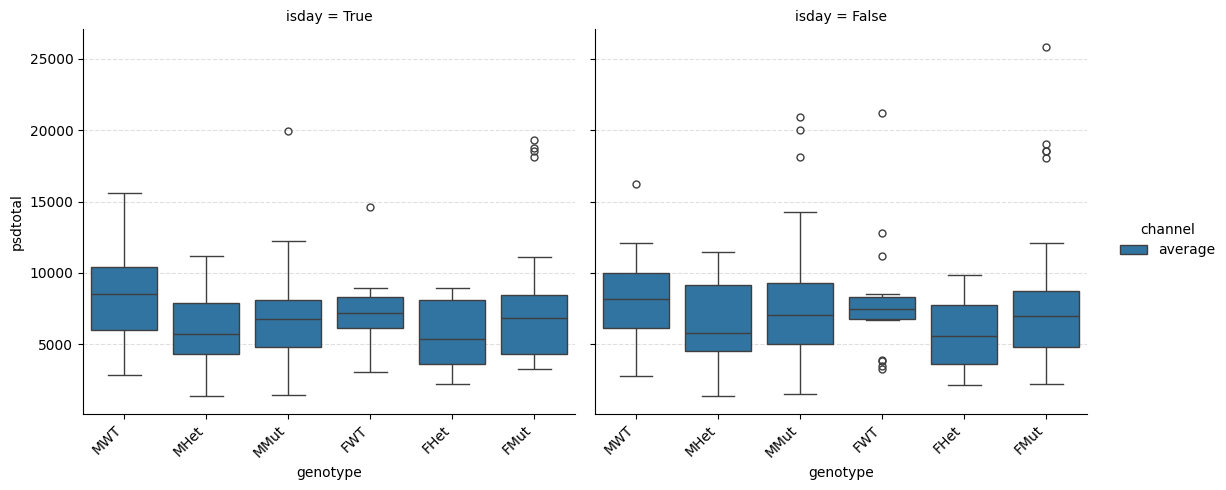

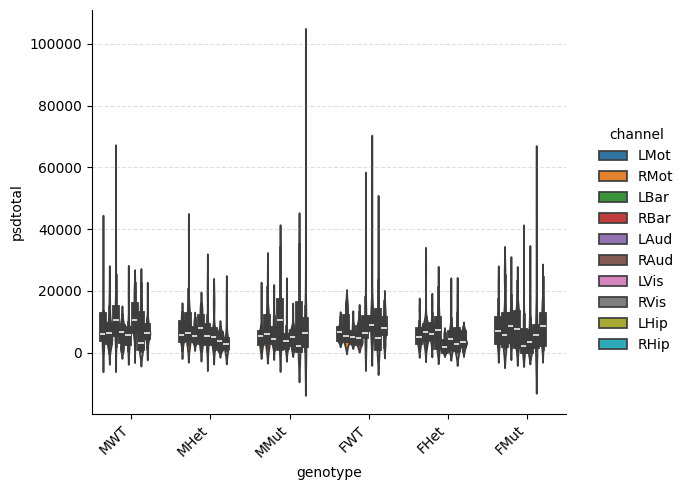

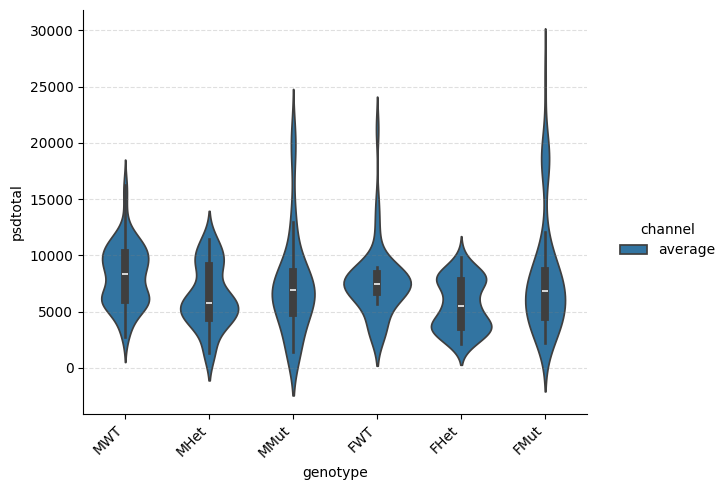

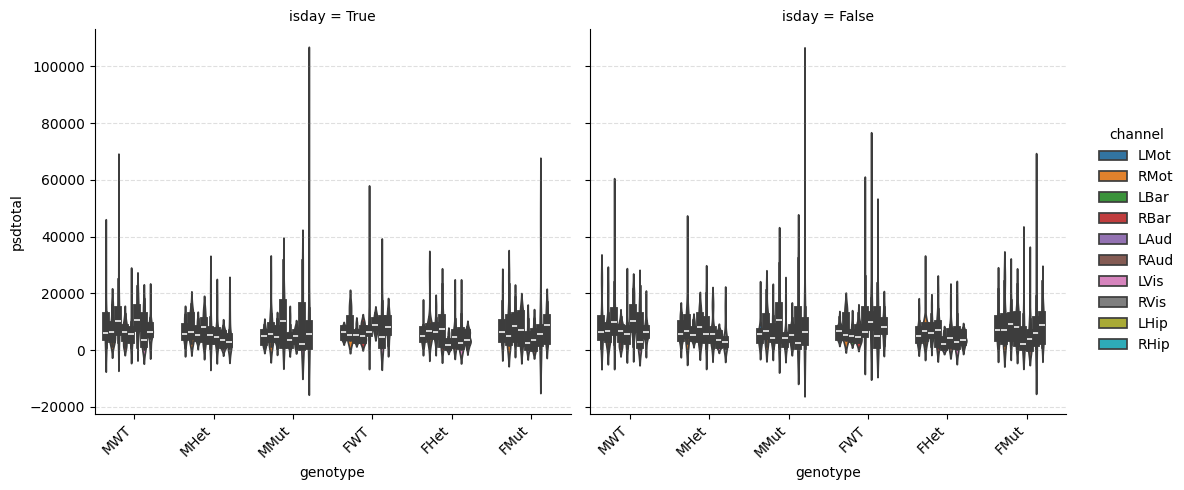

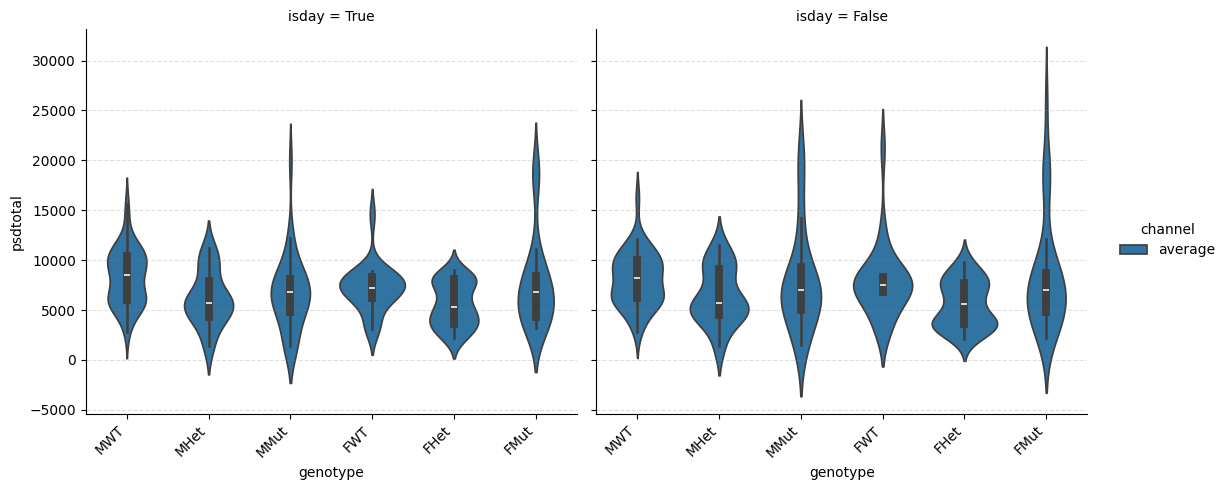

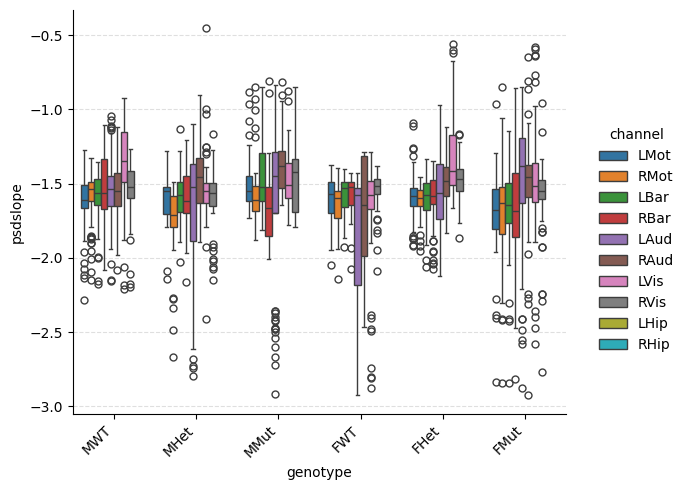

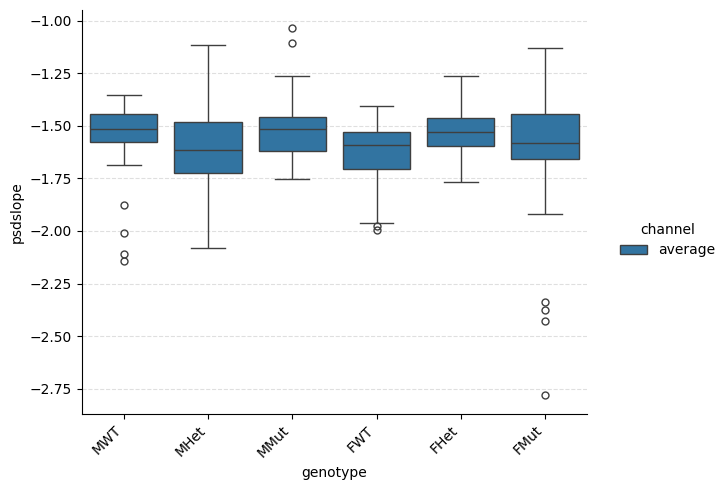

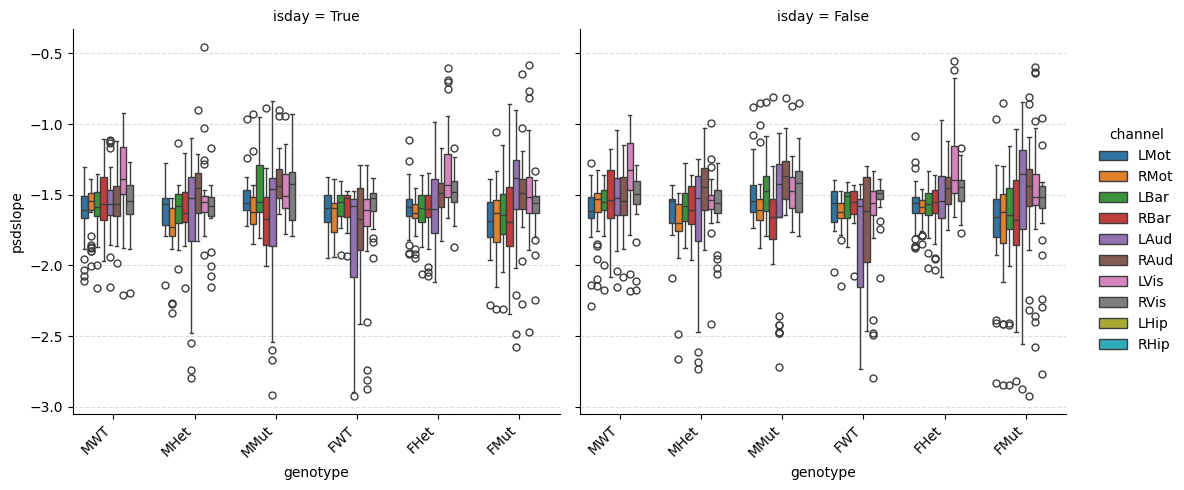

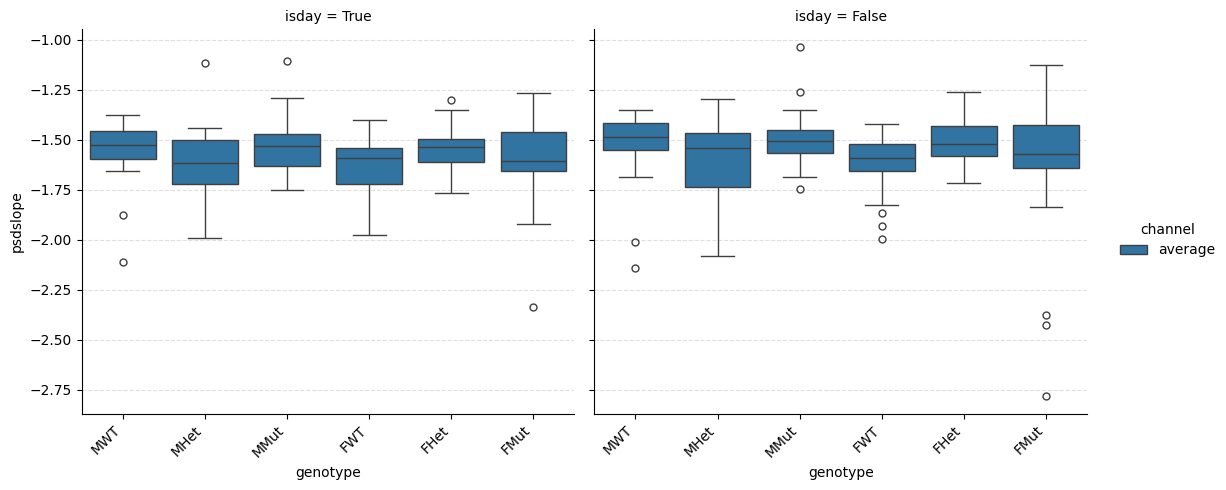

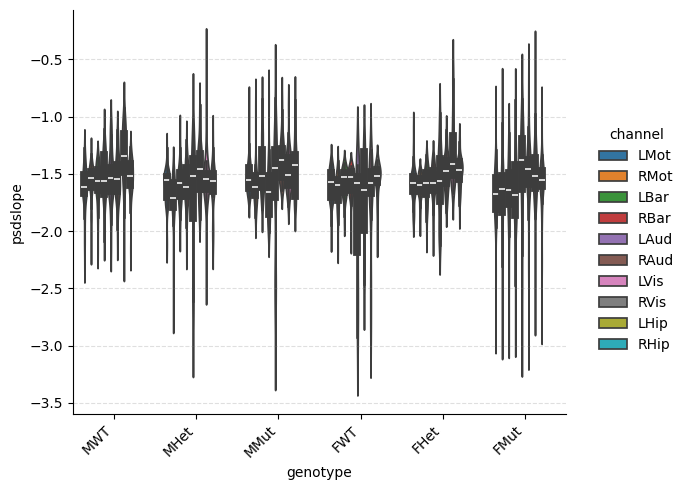

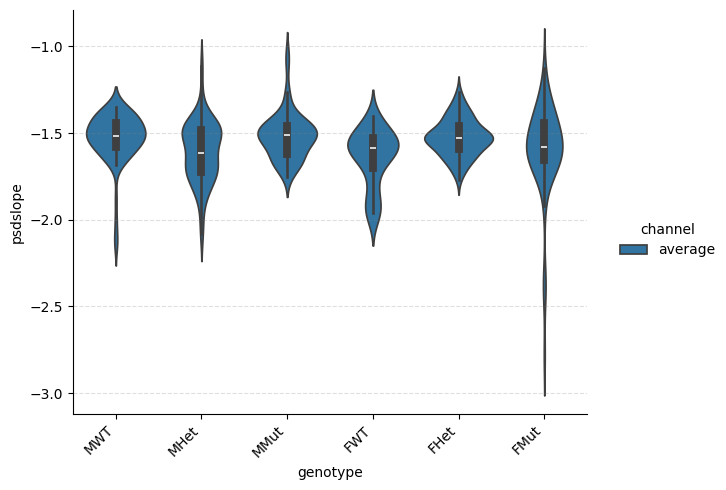

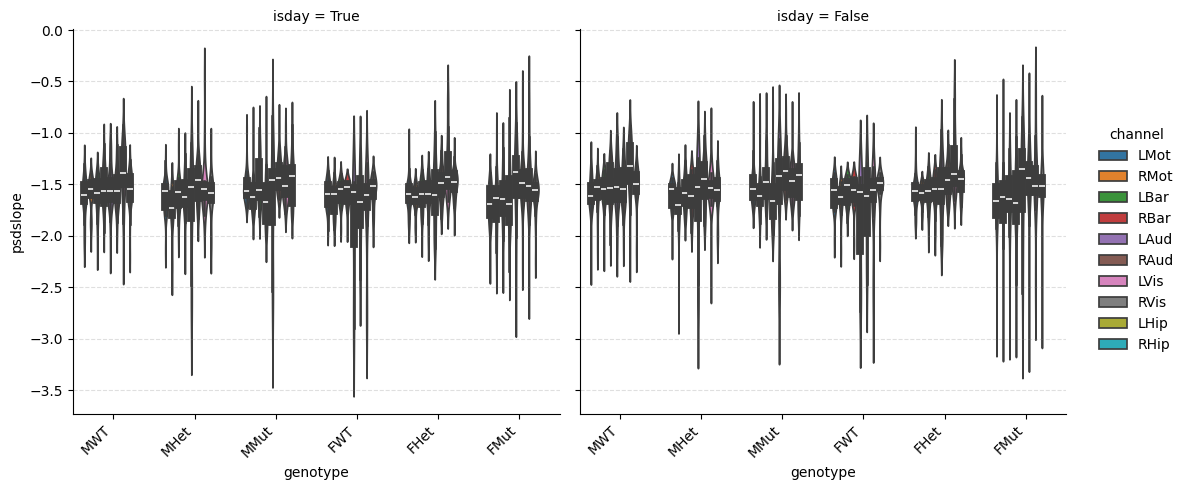

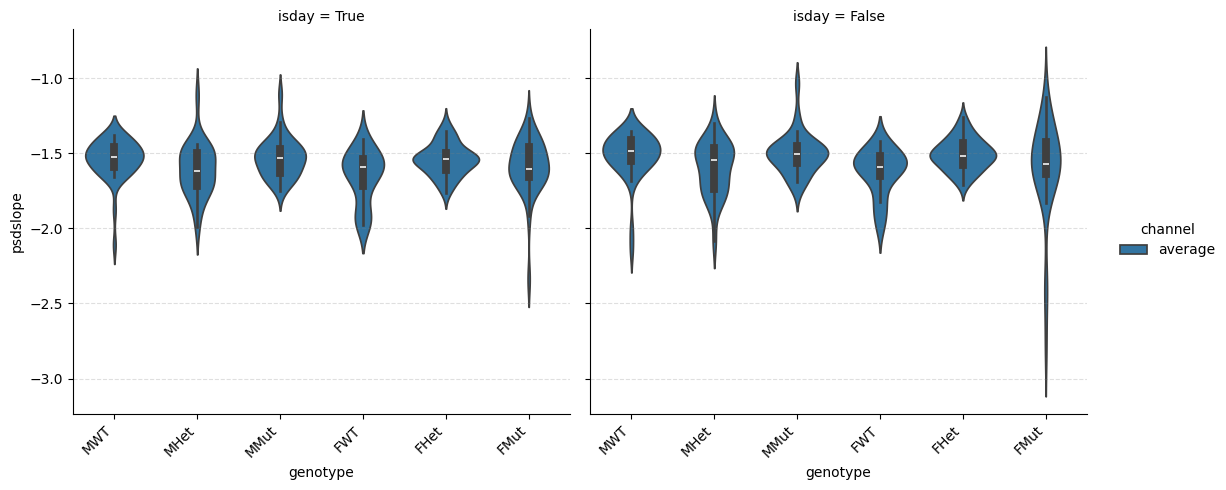

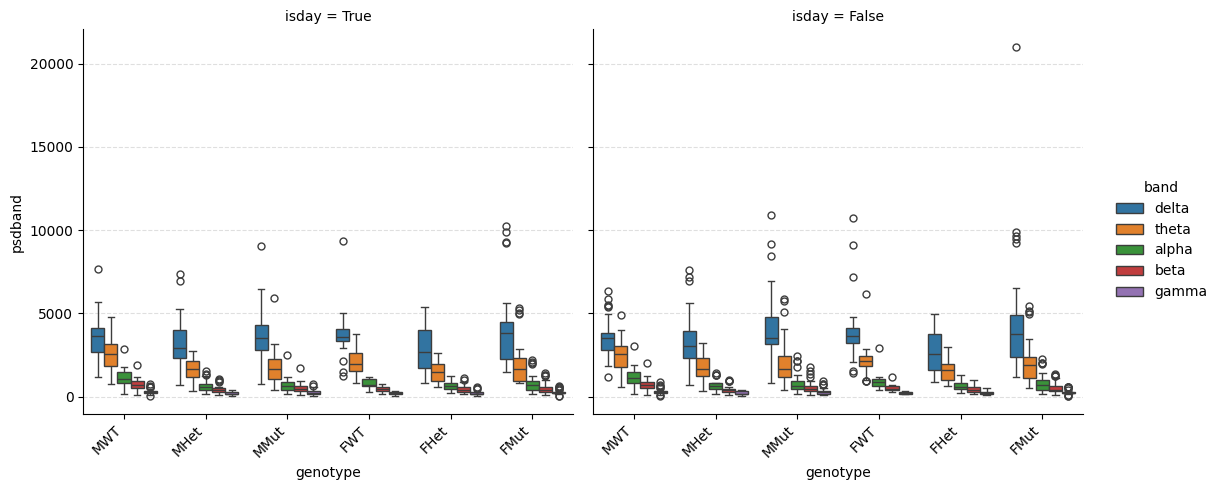

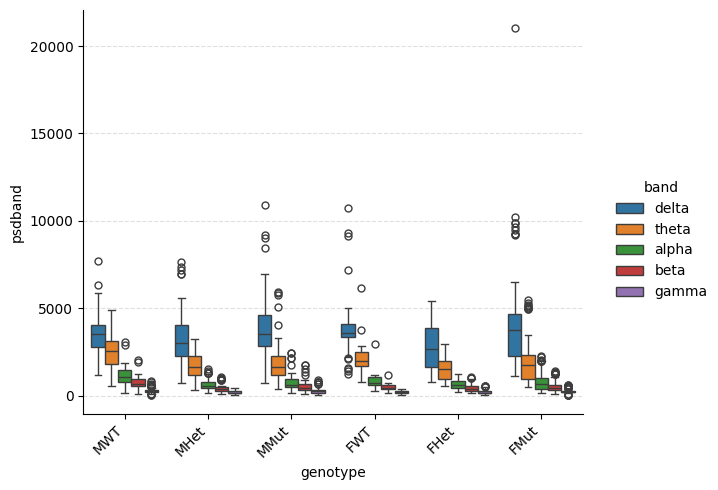

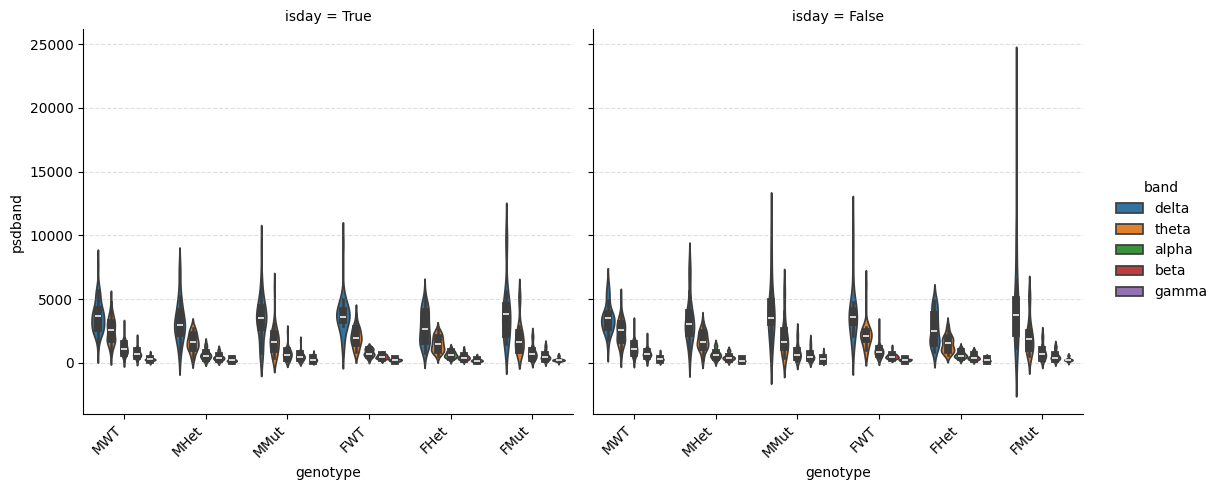

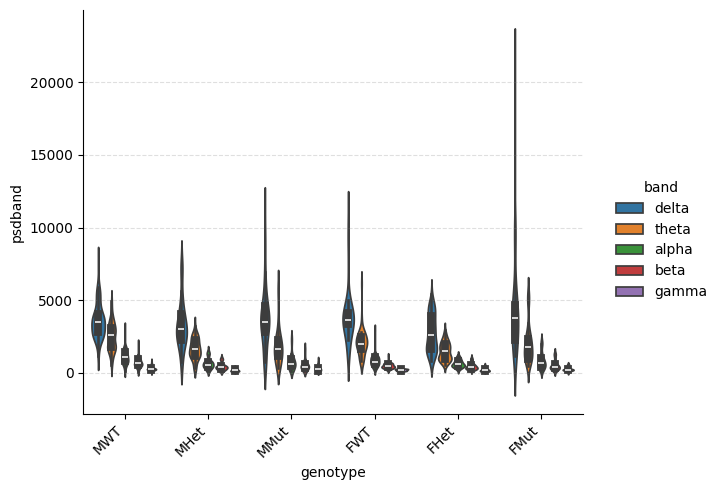

In [ ]:
for feature in constants.LINEAR_FEATURES:
    if feature in ['nspike', 'psdfrac', 'logrms', 'logampvar', 'logpsdtotal', 'lognspike', 'logpsdband', 'logpsdfrac']:
        print(f"Skipping feature {feature}")
        continue
    for kind in ['box', 'violin']:
        for groupby in ['genotype', ['genotype', 'isday']]:
            for collapse in [False, True]:
                ep.plot_catplot(feature, groupby=groupby, kind=kind, collapse_channels=collapse)
for kind in ['box', 'violin']:
    ep.plot_catplot('psdband', groupby=['genotype', 'isday'], 
                    x='genotype',
                    col='isday',
                    hue='band',
                    kind=kind, collapse_channels=True)
    ep.plot_catplot('psdband', groupby=['genotype'], 
                    x='genotype',
                    hue='band',
                    kind=kind, collapse_channels=True)

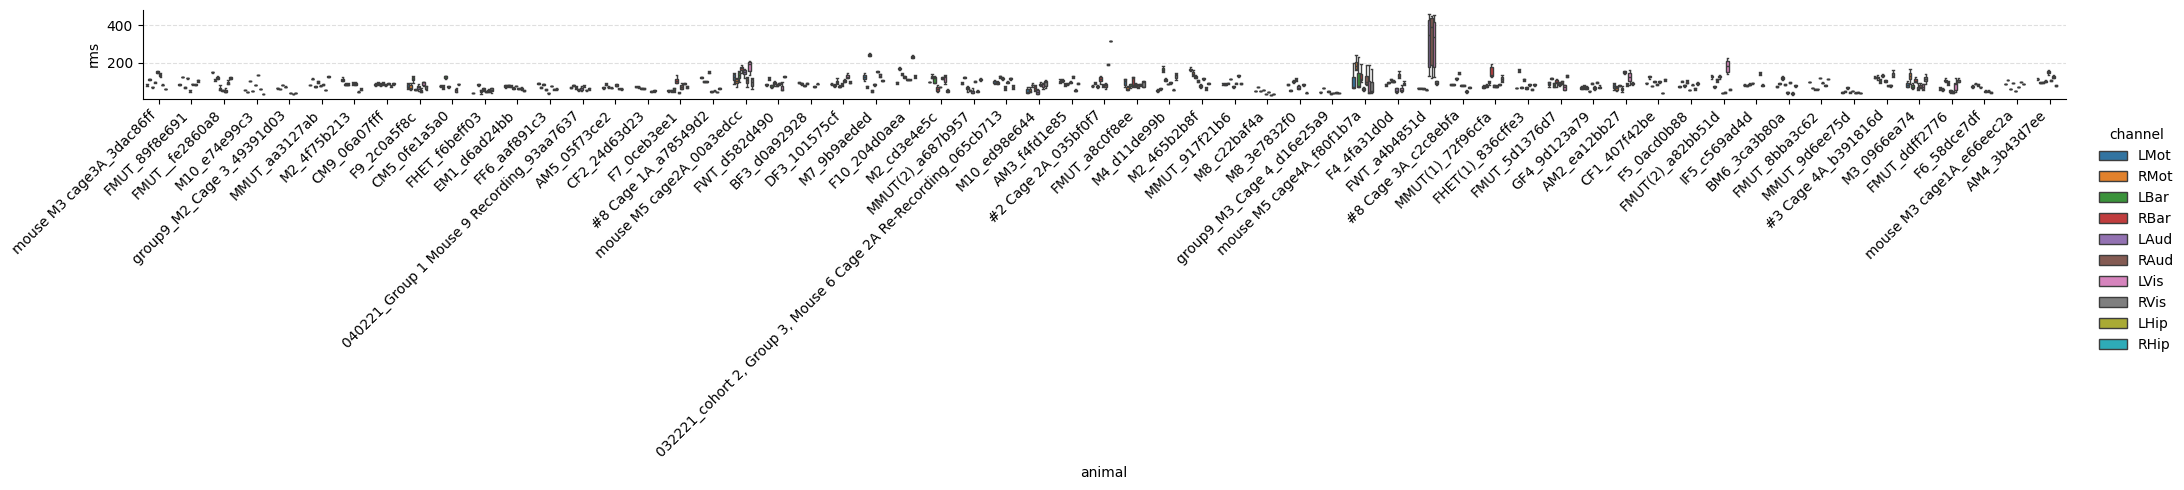

In [ ]:
ep.plot_catplot('rms', groupby='animal', kind='box', catplot_params={'showfliers': False, 'aspect': 4})

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:627: RuntimeWarning: Mean of empty slice
  avg_matrix

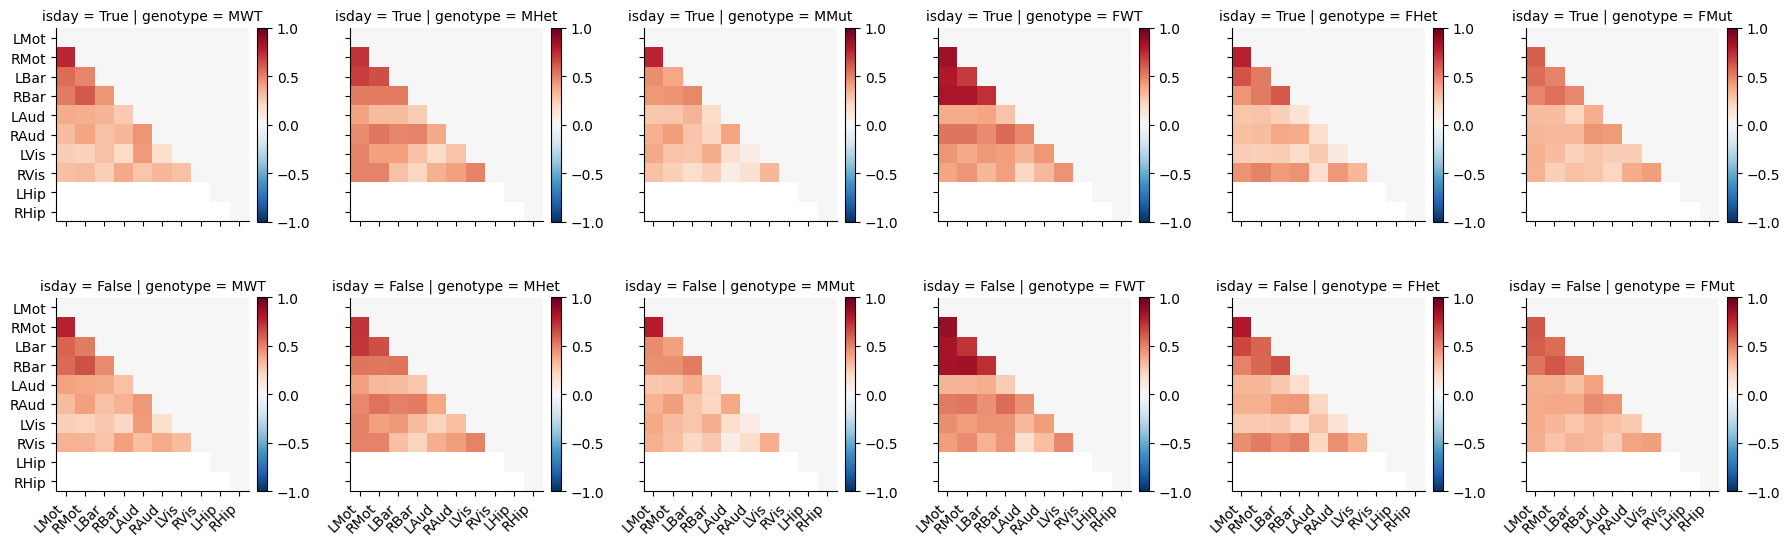

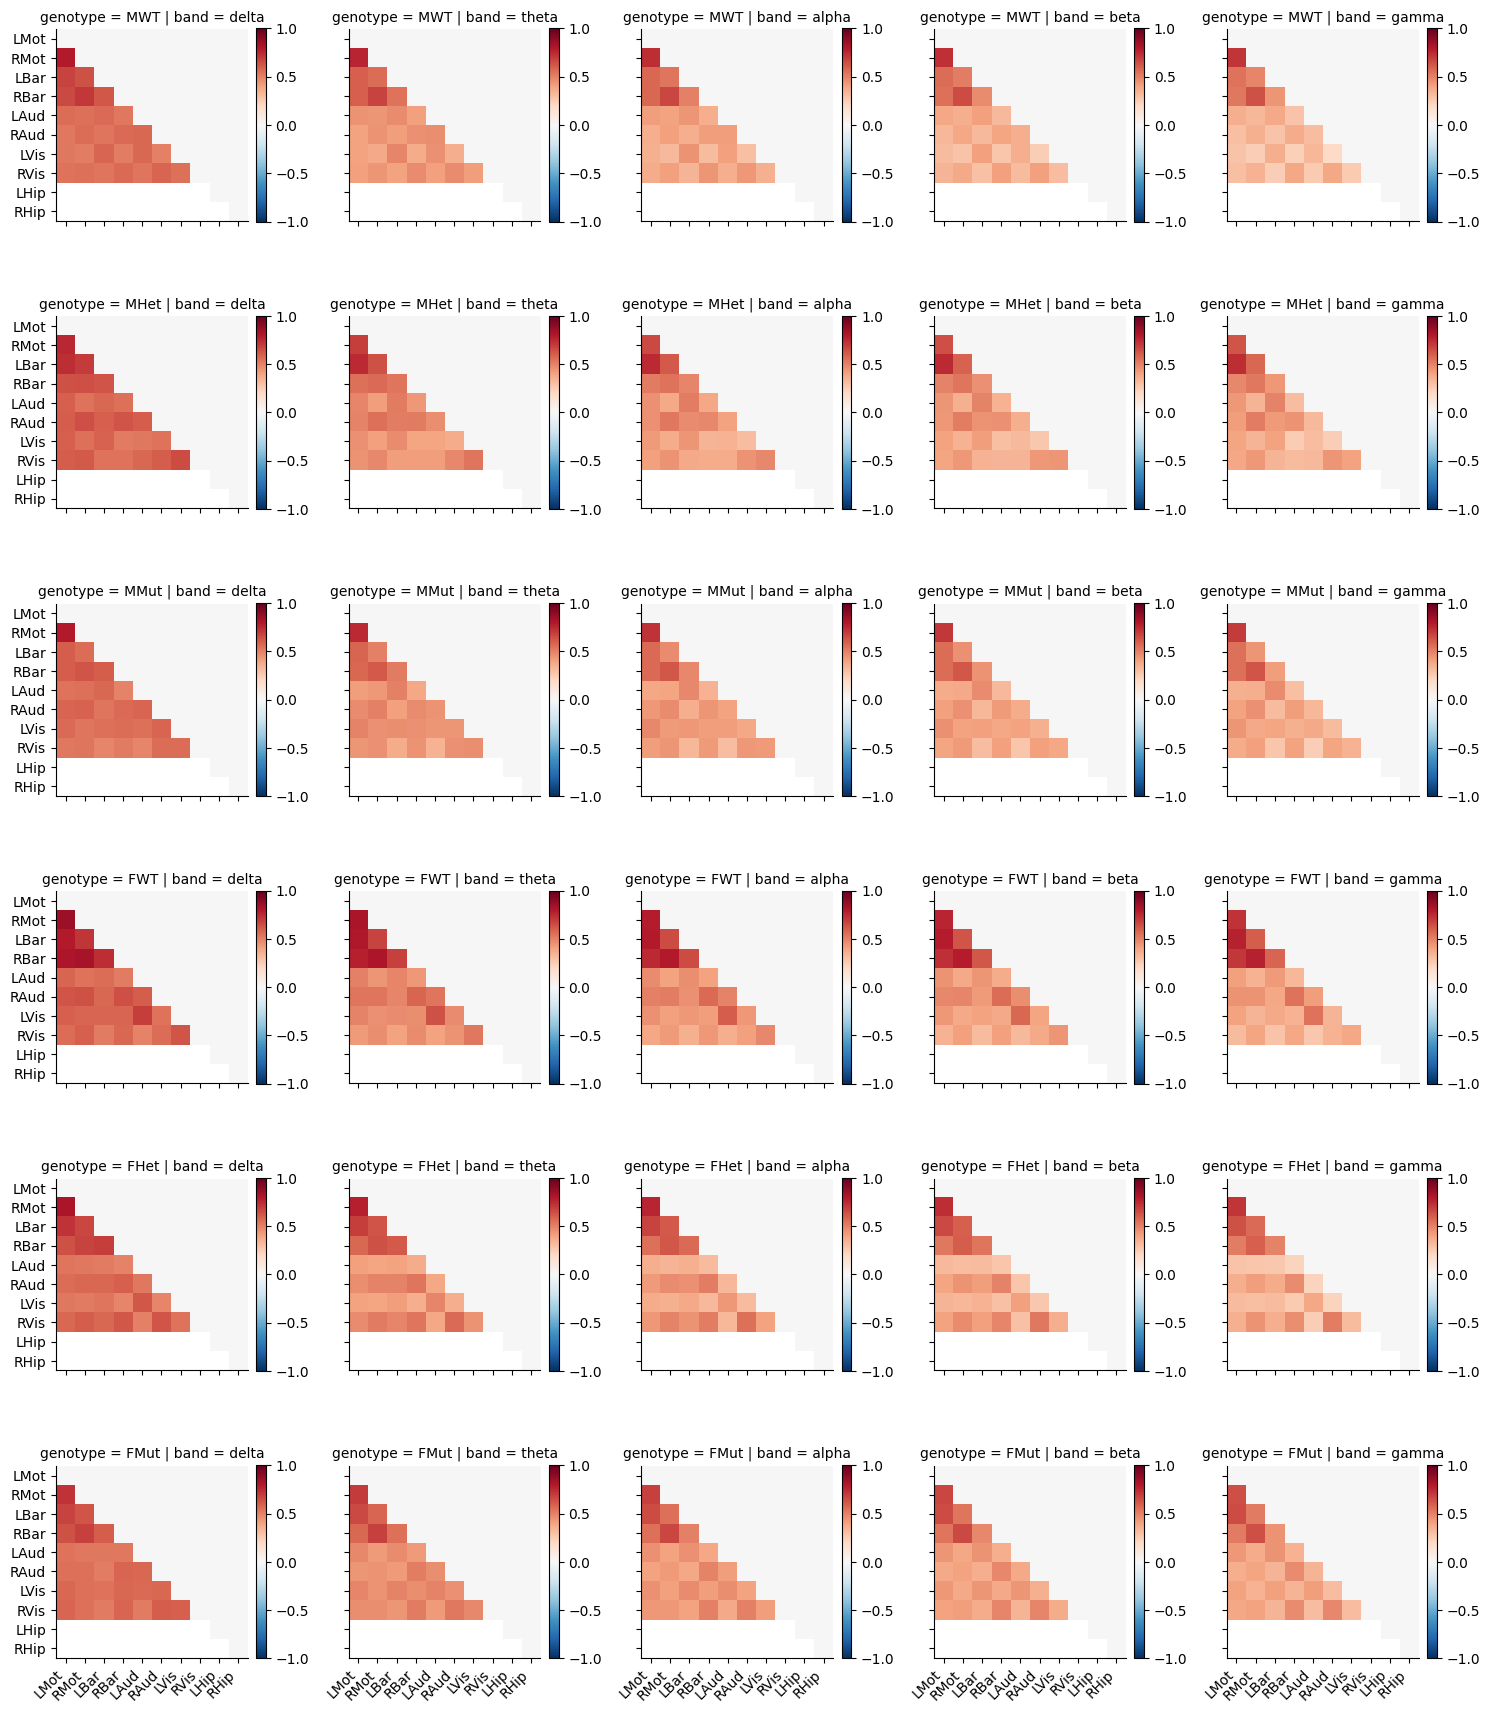

In [ ]:
ep.plot_heatmap('pcorr', groupby=['genotype', 'isday'])
ep.plot_heatmap('cohere', groupby=['genotype', 'isday'], col='band', row='genotype')

In [ ]:
logger.setLevel(logging.DEBUG)

In [ ]:
for e in sar:
    e.convert_to_mne(chunk_len=1440)
    e.save_fif_and_json(Path(f'./test-mnes/{e.animal_day}').resolve(), overwrite=True)

NameError: name 'sar' is not defined

In [ ]:
reconstruct_sas = visualization.SpikeAnalysisResult.load_fif_and_json('./test-mnes/A5 WT Dec-12-2023')
mne_obj = reconstruct_sas.result_mne

Opening raw data file test-mnes/A5 WT Dec-12-2023/A5-WT-A5 WT Dec-12-2023-raw.fif...
    Reading extended channel information
Isotrak not found
    Range : 0 ... 40067758 =      0.000 ... 40067.758 secs
Ready.
2025-03-21 21:23:35,173 - INFO - Channel names: 	['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel', 'Intan Input (1)/PortB L Motor', 'Intan Input (1)/PortB R Motor', 'Intan Input (1)/PortB R Barrel', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx']
2025-03-21 21:23:35,174 - INFO - Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


Used Annotations descriptions: [np.str_('Intan Input (1)/PortB L Aud Ctx'), np.str_('Intan Input (1)/PortB L Barrel'), np.str_('Intan Input (1)/PortB L Hipp'), np.str_('Intan Input (1)/PortB L Motor'), np.str_('Intan Input (1)/PortB L Vis Ctx'), np.str_('Intan Input (1)/PortB R Aud Ctx'), np.str_('Intan Input (1)/PortB R Barrel'), np.str_('Intan Input (1)/PortB R Hipp'), np.str_('Intan Input (1)/PortB R Motor'), np.str_('Intan Input (1)/PortB R Vis Ctx')]


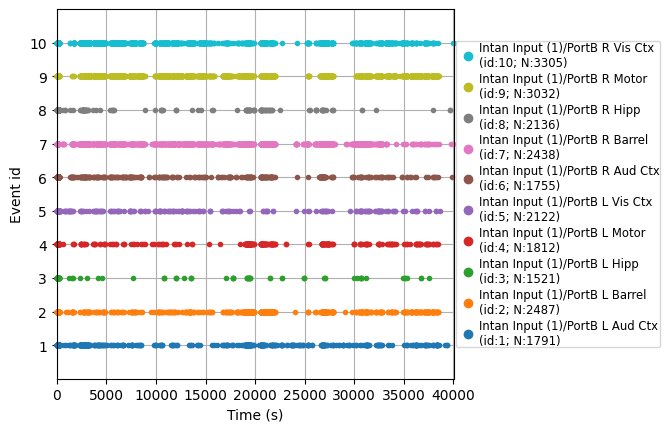

In [ ]:
logger.setLevel(logging.WARNING)
events, event_id = mne.events_from_annotations(raw=mne_obj)
fig = mne.viz.plot_events(events, sfreq=mne_obj.info['sfreq'], first_samp=mne_obj.first_samp, event_id=event_id)

In [ ]:
# Pivot the DataFrame to create Day and Night columns
df_pivoted = df.pivot_table(
    index=['animal', 'band'],  # These columns will identify unique rows
    columns='isday',           # The Day/Night values will become columns
    values='values',           # The values will be spread into Day/Night columns
    aggfunc='first'           # Since we expect one value per Day/Night, use first
).reset_index()

# Rename columns for clarity (optional)
df_pivoted.columns.name = None  # Remove the columns name
display(df_pivoted)
